In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Specify the path to your folder
path_to_folder = "/content/drive/MyDrive/Research_Project_AQI_ExTR_Finalized_Datasets/Classification_Completed_Datasets"

averaged_resultant_rfc_dataset = pd.read_csv(f"{path_to_folder}/completed_dataset_rfc.csv")

Mounted at /content/drive


In [ ]:
# prompt: in this averaged_resultant_rfc_dataset, for values in each column that are below 0, replace it with the minimum non-negative alue for the respective column

cols = ['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene']

for col in averaged_resultant_rfc_dataset.columns:
    if col in cols:
        min_non_negative = averaged_resultant_rfc_dataset[col][averaged_resultant_rfc_dataset[col] >= 0].min()
        if min_non_negative is not None:
            averaged_resultant_rfc_dataset.loc[averaged_resultant_rfc_dataset[col] < 0, col] = min_non_negative
        else:
            # Handle cases where all values in the column are negative
            print(f"All values in column '{col}' are negative. No suitable replacement found.")
            # You might choose to fill with 0 or another default value in this case:
            # averaged_resultant_rfc_dataset.loc[averaged_resultant_rfc_dataset[col] < 0, col] = 0

averaged_resultant_rfc_dataset.head()


City             Datetime   PM2.5    PM10      NO    NO2     NOx    NH3  \
0  Delhi  2015-01-01 16:00:00  211.51  340.66   13.09  37.08   47.07  33.54   
1  Delhi  2015-01-01 17:00:00  191.12  257.40   15.44  38.40   51.24  34.98   
2  Delhi  2015-01-01 18:00:00  218.44  351.01   22.85  44.73   59.26  34.80   
3  Delhi  2015-01-01 19:00:00  296.80  600.95   69.20  47.76  101.68  34.25   
4  Delhi  2015-01-01 20:00:00  336.43  714.63  148.42  46.31  171.10  35.75   

      CO    SO2     O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  \
0  15.24  12.33  34.35     3.51     5.85    4.73  456.0     Severe   
1  13.11  18.00  34.38     3.58     5.23    3.78  450.0     Severe   
2  18.35  19.17  38.42     3.67     5.93    4.98  446.0     Severe   
3  16.67  21.50  49.12    14.75    27.13    8.78  475.0     Severe   
4  12.17  17.67  56.44    26.56    45.62    9.99  480.0     Severe   

         Date      Time  
0  2015-01-01  16:00:00  
1  2015-01-01  17:00:00  
2  2015-01-01  18:00:00  
3  2015-01-01  19:00:00  
4  2015-01-01  20:00:00

In [ ]:
# prompt: show max, min, etc for each column in "cols = ['PM2.5',
#  'PM10',
#  'NO',
#  'NO2',
#  'NOx',
#  'NH3',
#  'CO',
#  'SO2',
#  'O3',
#  'Benzene',
#  'Toluene',
#  'Xylene']"

for col in cols:
  print(f"Column: {col}")
  print(f"  Max: {averaged_resultant_rfc_dataset[col].max()}")
  print(f"  Min: {averaged_resultant_rfc_dataset[col].min()}")
  print(f"  Mean: {averaged_resultant_rfc_dataset[col].mean()}")
  print(f"  Median: {averaged_resultant_rfc_dataset[col].median()}")
  print(f"  Standard Deviation: {averaged_resultant_rfc_dataset[col].std()}")
  print("-" * 20)


Column: PM2.5
  Max: 938.5
  Min: 0.05
  Mean: 117.11282017677648
  Median: 86.83999999999999
  Standard Deviation: 95.06933898138018
--------------------
Column: PM10
  Max: 1000.0
  Min: 1.2096688775024138
  Mean: 226.9201041630789
  Median: 199.13
  Standard Deviation: 146.9667585688851
--------------------
Column: NO
  Max: 497.3999999999999
  Min: 0.05
  Mean: 39.091326152324164
  Median: 19.09
  Standard Deviation: 50.256406924907196
--------------------
Column: NO2
  Max: 337.82
  Min: 1.2822684007489922
  Mean: 50.65079971164434
  Median: 44.15
  Standard Deviation: 28.111175232607344
--------------------
Column: NOx
  Max: 433.78
  Min: 0.0
  Mean: 58.56520426802402
  Median: 42.515
  Standard Deviation: 48.91099633634833
--------------------
Column: NH3
  Max: 485.52
  Min: 0.1340994461841672
  Mean: 41.87383243814538
  Median: 37.28
  Standard Deviation: 20.344546162173017
--------------------
Column: CO
  Max: 47.42
  Min: 0.0
  Mean: 1.9844359069094626
  Median: 1.1
  Stan

In [ ]:
feature_columns_all = averaged_resultant_rfc_dataset.columns.tolist()
features_to_remove = ['City', 'Datetime', 'AQI', 'AQI_Bucket', 'Date', 'Time']
feature_cols = [col for col in feature_columns_all if col not in features_to_remove]

feature_cols

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene']

In [ ]:
# sort by "Datetime" column
averaged_resultant_rfc_dataset = averaged_resultant_rfc_dataset.sort_values(by="Datetime")

averaged_resultant_rfc_dataset

City             Datetime   PM2.5        PM10      NO    NO2     NOx  \
47694  Delhi  2015-01-01 01:00:00  454.58  935.180000   81.52  41.78  187.66   
47695  Delhi  2015-01-01 02:00:00  440.44  874.220879   70.80  43.46  176.83   
47696  Delhi  2015-01-01 03:00:00  409.09  842.413294  132.46  41.19  141.02   
47697  Delhi  2015-01-01 04:00:00  436.12  881.655247   84.78  39.55  102.84   
47698  Delhi  2015-01-01 05:00:00  415.88  976.990000   60.24  37.41   80.12   
...      ...                  ...     ...         ...     ...    ...     ...   
47689  Delhi  2020-06-30 20:00:00   43.19  123.260000    6.33  22.28   17.66   
47690  Delhi  2020-06-30 21:00:00   45.30  125.220000    6.34  22.91   17.96   
47691  Delhi  2020-06-30 22:00:00   49.04  129.390000    6.29  20.95   16.80   
47692  Delhi  2020-06-30 23:00:00   50.51  128.860000    6.19  20.40   16.83   
47693  Delhi  2020-07-01 00:00:00   54.01  128.660000    6.33  21.05   16.81   

         NH3     CO    SO2     O3  Benzene  Toluene  Xylene         AQI  \
47694  27.54   9.29   3.41  54.94    25.24    58.57   13.80  526.280000   
47695  27.72  13.28   3.88  50.53    23.10    49.37   15.63  524.250000   
47696  28.94  29.67   2.83  19.33    19.04    38.94   17.18  487.350000   
47697  29.30  21.76   4.33  20.08    13.99    27.53   16.82  494.516667   
47698  30.84  26.19   6.17  16.00    11.14    21.99   14.29  477.496667   
...      ...    ...    ...    ...      ...      ...     ...         ...   
47689  29.92   0.92  10.64  44.13     1.63    17.83    0.86   97.000000   
47690  29.95   1.04  10.59  39.62     1.72    18.06    1.16   99.000000   
47691  30.01   1.00  10.20  38.95     1.66    16.17    1.18  101.000000   
47692  29.40   0.94  10.98  34.53     1.60    16.79    0.85  102.000000   
47693  29.06   0.97  11.15  29.73     2.03    23.57    0.65  101.000000   

         AQI_Bucket        Date      Time  
47694        Severe  2015-01-01  01:00:00  
47695        Severe  2015-01-01  02:00:00  
47696        Severe  2015-01-01  03:00:00  
47697        Severe  2015-01-01  04:00:00  
47698        Severe  2015-01-01  05:00:00  
...             ...         ...       ...  
47689  Satisfactory  2020-06-30  20:00:00  
47690  Satisfactory  2020-06-30  21:00:00  
47691      Moderate  2020-06-30  22:00:00  
47692      Moderate  2020-06-30  23:00:00  
47693      Moderate  2020-07-01  00:00:00  

[48192 rows x 18 columns]

In [ ]:
# Split the data into 80-20 ratio
from sklearn.model_selection import train_test_split

main_dataset = averaged_resultant_rfc_dataset.copy()
main_dataset.head()

City             Datetime   PM2.5        PM10      NO    NO2     NOx  \
47694  Delhi  2015-01-01 01:00:00  454.58  935.180000   81.52  41.78  187.66   
47695  Delhi  2015-01-01 02:00:00  440.44  874.220879   70.80  43.46  176.83   
47696  Delhi  2015-01-01 03:00:00  409.09  842.413294  132.46  41.19  141.02   
47697  Delhi  2015-01-01 04:00:00  436.12  881.655247   84.78  39.55  102.84   
47698  Delhi  2015-01-01 05:00:00  415.88  976.990000   60.24  37.41   80.12   

         NH3     CO   SO2     O3  Benzene  Toluene  Xylene         AQI  \
47694  27.54   9.29  3.41  54.94    25.24    58.57   13.80  526.280000   
47695  27.72  13.28  3.88  50.53    23.10    49.37   15.63  524.250000   
47696  28.94  29.67  2.83  19.33    19.04    38.94   17.18  487.350000   
47697  29.30  21.76  4.33  20.08    13.99    27.53   16.82  494.516667   
47698  30.84  26.19  6.17  16.00    11.14    21.99   14.29  477.496667   

      AQI_Bucket        Date      Time  
47694     Severe  2015-01-01  01:00:00  
47695     Severe  2015-01-01  02:00:00  
47696     Severe  2015-01-01  03:00:00  
47697     Severe  2015-01-01  04:00:00  
47698     Severe  2015-01-01  05:00:00

In [ ]:
X = main_dataset[feature_cols]
y = main_dataset['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

PM2.5    PM10      NO     NO2     NOx     NH3     CO    SO2      O3  \
165    255.30  341.07   23.26   42.45   56.74  175.88  11.70   2.97   24.07   
30255   51.40  136.87   13.22   35.81   32.40   36.85   0.94  15.05   43.21   
9742   134.84  264.79   19.48   71.30   75.73   32.92  10.69  17.52  111.24   
20650   68.25  271.49  148.56  130.20  124.70   70.61   0.85  37.92   19.41   
44255   70.65  127.00   11.66   37.64   31.62   34.77   0.79  11.31   56.47   

       Benzene  Toluene     Xylene  
165       5.90    10.99   4.410000  
30255     2.23    24.25  34.500000  
9742      2.84     5.72   0.511388  
20650     3.61    15.85   0.000000  
44255     2.07     9.10   0.090000

In [ ]:
X_test.head()

PM2.5    PM10      NO     NO2     NOx    NH3    CO    SO2      O3  \
8598   229.16  383.92   63.52  101.05   88.94  82.18  9.03  28.72  106.47   
30275   58.00  142.42   23.52   38.86   42.40  51.74  0.79  10.73   19.55   
45057   71.90  173.29   47.92   42.19   65.80  33.68  1.02  11.87   16.91   
41812  334.39  530.82  139.99   77.26  171.34  55.06  4.03  15.61   29.29   
18854  129.52  298.06  115.92   74.64   75.45  81.71  0.88  18.06   41.04   

       Benzene  Toluene     Xylene  
8598      3.95     4.37   0.019172  
30275     2.54    33.03   1.170000  
45057     3.04    28.03  11.640000  
41812     6.65    66.79   1.920000  
18854     6.70    18.44   0.000000

In [ ]:
apply_to_cols = ['PM2.5', 'PM10']

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
import pandas as pd


def apply_arima_residualization(
    X_train: pd.DataFrame,
    X_test: pd.DataFrame,
    feature_cols: list,
    apply_to_cols: list,
    arima_order=(1, 1, 1),
):
    """
    Applies ARIMA-based residualization to selected temporal columns.
    ARIMA models are fit on training data only.
    Residuals are computed consistently for train and test sets.
    Non-temporal features are retained and standardized.

    Returns:
        X_train_processed, X_test_processed, fitted_arima_models
    """

    # Defensive copy
    X_train = X_train[feature_cols].reset_index(drop=True).copy()
    X_test = X_test[feature_cols].reset_index(drop=True).copy()

    # Ensure valid columns
    apply_to_cols = [c for c in apply_to_cols if c in feature_cols]

    train_out = {}
    test_out = {}
    arima_models = {}

    for col in feature_cols:
        if col in apply_to_cols:
            # Fit ARIMA on training series only
            model = ARIMA(X_train[col], order=arima_order)
            model_fit = model.fit()
            arima_models[col] = model_fit

            # Training residuals (as produced by ARIMA)
            train_out[col] = model_fit.resid.values

            # Proper out-of-sample forecasting for test period
            forecast = model_fit.get_forecast(steps=len(X_test))
            test_out[col] = forecast.resid.values

        else:
            # Retain non-temporal features unchanged
            train_out[col] = X_train[col].values
            test_out[col] = X_test[col].values

    # Convert to DataFrames
    X_train_processed = pd.DataFrame(train_out, columns=feature_cols)
    X_test_processed = pd.DataFrame(test_out, columns=feature_cols)

    # Standardize ALL features using training statistics
    scaler = StandardScaler()
    X_train_processed.loc[:, :] = scaler.fit_transform(X_train_processed)
    X_test_processed.loc[:, :] = scaler.transform(X_test_processed)

    return X_train_processed, X_test_processed, arima_models


# Step 2: Apply the ARIMA function to the training and test data
X_train_arima, X_test_arima, arima_models = apply_arima_residualization(X_train, X_test, feature_cols, apply_to_cols)

# Now, X_train_arima and X_test_arima contain the residuals from the ARIMA model for specified columns
X_train_arima.head(), X_test_arima.head()


(        PM2.5        PM10      NO     NO2     NOx     NH3     CO    SO2  \
 0  255.300000  341.070000   23.26   42.45   56.74  175.88  11.70   2.97   
 1 -201.579491 -197.066439   13.22   35.81   32.40   36.85   0.94  15.05   
 2  -18.796920   27.783725   19.48   71.30   75.73   32.92  10.69  17.52   
 3  -78.301643   25.934984  148.56  130.20  124.70   70.61   0.85  37.92   
 4  -56.914789 -124.986075   11.66   37.64   31.62   34.77   0.79  11.31   
 
        O3  Benzene  Toluene     Xylene  
 0   24.07     5.90    10.99   4.410000  
 1   43.21     2.23    24.25  34.500000  
 2  111.24     2.84     5.72   0.511388  
 3   19.41     3.61    15.85   0.000000  
 4   56.47     2.07     9.10   0.090000  ,
         PM2.5        PM10      NO     NO2     NOx    NH3    CO    SO2      O3  \
 0  229.160000  383.920000   63.52  101.05   88.94  82.18  9.03  28.72  106.47   
 1 -194.979491 -191.516439   23.52   38.86   42.40  51.74  0.79  10.73   19.55   
 2  -81.736920  -63.716275   47.92   42.19 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 2: Apply PCA on the ARIMA residuals from Step 1
def apply_pca(X_train_arima, X_test_arima, n_components=0.95):
    # Initialize the scaler
    scaler = StandardScaler()

    # Fit the scaler only on the training data and transform both train and test data
    X_train_scaled = scaler.fit_transform(X_train_arima)
    X_test_scaled = scaler.transform(X_test_arima)  # Use transform, not fit_transform

    # Apply PCA to the scaled training data
    pca = PCA(n_components=n_components)  # Retain 95% variance by default
    X_train_pca = pca.fit_transform(X_train_scaled)

    # Apply the same PCA transformation to the test data
    X_test_pca = pca.transform(X_test_scaled)  # Apply the same PCA to the test data

    # Create DataFrames for the PCA-transformed data
    pca_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
    X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_columns)
    X_test_pca_df = pd.DataFrame(X_test_pca, columns=pca_columns)

    return X_train_pca_df, X_test_pca_df, pca

# Apply the PCA function to both training and test ARIMA residuals
X_train_pca, X_test_pca, pca = apply_pca(X_train_arima, X_test_arima)

# Now, X_train_pca and X_test_pca contain the PCA-transformed data from the ARIMA residuals
X_train_pca.head(), X_test_pca.head()

(        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
 0  3.926733  2.087716 -2.316681  5.789996 -0.626828 -1.993842  0.083422   
 1 -2.010374  2.308979  0.540047 -1.309523  2.401573 -0.642978  0.488053   
 2  0.395326  1.511457 -1.547065  0.639710 -0.518187  2.642157 -0.580481   
 3  2.340009 -1.316216 -0.068112 -0.141562  2.087097 -0.496127 -2.507272   
 4 -1.551414 -0.072133 -0.061676 -0.251302 -0.422032 -0.049758 -0.348369   
 
         PC8       PC9      PC10  
 0  2.077446  0.339152 -0.435764  
 1  1.128537  0.404347  0.192938  
 2 -0.674804  0.429433 -0.230674  
 3 -0.560523  0.590133 -0.259049  
 4  0.166155  0.062616  0.160446  ,
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
 0  3.821642  0.449145 -3.101745  1.795604 -0.621849  0.743270  0.279426   
 1 -1.559633  0.059569  1.467234  0.069643  0.405382 -0.274382 -1.165240   
 2 -0.637024  0.596424  1.242978 -0.409497  0.907000 -0.446735  0.045365   
 3  4.647902  0.150579  1.6

In [ ]:
# Save the pca model
import pickle
with open('pca_model.pkl', 'wb') as file:
    pickle.dump(pca, file)

In [ ]:
import numpy as np
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    explained_variance_score, max_error,
    accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
)
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost as xgb
import lightgbm as lgb

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Define custom metrics
def mean_relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.abs(y_true))) * 100

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(2.0 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100

def mean_absolute_scaled_error(y_true, y_pred, seasonality=1):
    naive_forecast_error = np.mean(np.abs(y_true[seasonality:] - y_true[:-seasonality]))
    return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


## [1] Random Forest + ETR

In [ ]:
def HybridModel(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize Random Forest and Extra Trees Regressors
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Train both models on the training data
    rf_model.fit(X_train_pca, y_train)
    et_model.fit(X_train_pca, y_train)

    # Predict using both models
    rf_predictions = rf_model.predict(X_test_pca)
    et_predictions = et_model.predict(X_test_pca)

    # Combine predictions (average blending)
    hybrid_predictions = (rf_predictions + et_predictions) / 2

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, hybrid_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, hybrid_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, hybrid_predictions)  # Explained Variance Score
    reg_max_error = np.max(np.abs(y_test - hybrid_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, hybrid_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, hybrid_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, hybrid_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, hybrid_predictions)  # Mean Absolute Scaled Error
    reg_r2 = r2_score(y_test, hybrid_predictions)  # R-squared

    # Print results
    print("\nHybrid Model Evaluation (Random Forest + Extra Trees):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return hybrid_predictions


# Step 4: Train and evaluate the hybrid model
hybrid_predictions = HybridModel(X_train_pca, y_train, X_test_pca, y_test)


Hybrid Model Evaluation (Random Forest + Extra Trees):
Mean Squared Error (MSE): 2549.3061987898
Mean Absolute Error (MAE): 36.5788163999
Explained Variance Score (EVS): 0.8282394517
Max Error: 347.4850000000
Mean Relative Error (MRE): 0.1637235469
Mean Absolute Percentage Error (MAPE): 16.3723546904
Symmetric Mean Absolute Percentage Error (SMAPE): 15.3184576665
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8281939436


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


In [ ]:
hybrid_predictions = HybridModel(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (Random Forest + Extra Trees):
Mean Squared Error (MSE): 2215.2340102141
Mean Absolute Error (MAE): 33.4943466632
Explained Variance Score (EVS): 0.8507170144
Max Error: 325.1398333333
Mean Relative Error (MRE): 0.1463349535
Mean Absolute Percentage Error (MAPE): 14.6334953537
Symmetric Mean Absolute Percentage Error (SMAPE): 13.8549437309
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8507081576


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


## [2] Random Forest + XGBoost + ETR

In [ ]:
def HybridModel(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize Random Forest, Extra Trees, and XGBoost regressors
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
    xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

    # Train all models on the training data
    rf_model.fit(X_train_pca, y_train)
    et_model.fit(X_train_pca, y_train)
    xgb_model.fit(X_train_pca, y_train)

    # Predict using all three models
    rf_predictions = rf_model.predict(X_test_pca)
    et_predictions = et_model.predict(X_test_pca)
    xgb_predictions = xgb_model.predict(X_test_pca)

    # Combine predictions (average blending)
    hybrid_predictions = (rf_predictions + et_predictions + xgb_predictions) / 3

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, hybrid_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, hybrid_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, hybrid_predictions)  # Explained Variance Score
    reg_max_error = np.max(np.abs(y_test - hybrid_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, hybrid_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, hybrid_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, hybrid_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, hybrid_predictions)  # Mean Absolute Scaled Error
    reg_r2 = r2_score(y_test, hybrid_predictions)  # R-squared

    # Print results
    print("\nHybrid Model Evaluation (Random Forest + Extra Trees + XGBoost):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return hybrid_predictions


# Step 4: Train and evaluate the hybrid model
hybrid_predictions = HybridModel(X_train_pca, y_train, X_test_pca, y_test)


Hybrid Model Evaluation (Random Forest + Extra Trees + XGBoost):
Mean Squared Error (MSE): 2639.8971472050
Mean Absolute Error (MAE): 37.5782212526
Explained Variance Score (EVS): 0.8221042548
Max Error: 350.7340694173
Mean Relative Error (MRE): 0.1684879215
Mean Absolute Percentage Error (MAPE): 16.8487921528
Symmetric Mean Absolute Percentage Error (SMAPE): 15.8026139513
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8220887242


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


In [ ]:
hybrid_predictions = HybridModel(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (Random Forest + Extra Trees + XGBoost):
Mean Squared Error (MSE): 2318.0427266607
Mean Absolute Error (MAE): 34.7925859059
Explained Variance Score (EVS): 0.8437803468
Max Error: 336.3151867405
Mean Relative Error (MRE): 0.1533143859
Mean Absolute Percentage Error (MAPE): 15.3314385878
Symmetric Mean Absolute Percentage Error (SMAPE): 14.5174813184
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8437795430


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


## [3] XGBoost + ETR

In [ ]:
def HybridXGB_ET_Model(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize XGBoost and Extra Trees regressors
    xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Train both models on the training data
    xgb_model.fit(X_train_pca, y_train)
    et_model.fit(X_train_pca, y_train)

    # Predict using both models
    xgb_predictions = xgb_model.predict(X_test_pca)
    et_predictions = et_model.predict(X_test_pca)

    # Combine predictions (average blending)
    hybrid_predictions = (xgb_predictions + et_predictions) / 2

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, hybrid_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, hybrid_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, hybrid_predictions)  # Explained Variance Score
    reg_max_error = np.max(np.abs(y_test - hybrid_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, hybrid_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, hybrid_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, hybrid_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, hybrid_predictions)  # Mean Absolute Scaled Error
    reg_r2 = r2_score(y_test, hybrid_predictions)  # R-squared

    # Print results
    print("\nHybrid Model Evaluation (XGBoost + Extra Trees):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return hybrid_predictions


# Step 4: Train and evaluate the hybrid model
hybrid_predictions = HybridXGB_ET_Model(X_train_pca, y_train, X_test_pca, y_test)


Hybrid Model Evaluation (XGBoost + Extra Trees):
Mean Squared Error (MSE): 2684.8473350011
Mean Absolute Error (MAE): 38.0269550357
Explained Variance Score (EVS): 0.8190707245
Max Error: 342.7561041260
Mean Relative Error (MRE): 0.1707290312
Mean Absolute Percentage Error (MAPE): 17.0729031248
Symmetric Mean Absolute Percentage Error (SMAPE): 16.0248237332
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8190593845


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


In [ ]:
hybrid_predictions = HybridXGB_ET_Model(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (XGBoost + Extra Trees):
Mean Squared Error (MSE): 2371.5923633951
Mean Absolute Error (MAE): 35.4545074340
Explained Variance Score (EVS): 0.8401707015
Max Error: 332.4619967773
Mean Relative Error (MRE): 0.1570772235
Mean Absolute Percentage Error (MAPE): 15.7077223485
Symmetric Mean Absolute Percentage Error (SMAPE): 14.8649727013
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8401706583


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


## [4] XGBoost + ElasticNet + ETR

In [ ]:
def Hybrid_XGBoost_ElasticNet_ET_Model(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize XGBoost, ElasticNet, and Extra Trees regressors
    xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    en_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)  # ElasticNet with some default hyperparameters
    et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Train all three models on the training data
    xgb_model.fit(X_train_pca, y_train)
    en_model.fit(X_train_pca, y_train)
    et_model.fit(X_train_pca, y_train)

    # Predict using all three models
    xgb_predictions = xgb_model.predict(X_test_pca)
    en_predictions = en_model.predict(X_test_pca)
    et_predictions = et_model.predict(X_test_pca)

    # Combine predictions (average blending)
    hybrid_predictions = (xgb_predictions + en_predictions + et_predictions) / 3

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, hybrid_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, hybrid_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, hybrid_predictions)  # Explained Variance Score
    reg_max_error = np.max(np.abs(y_test - hybrid_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, hybrid_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, hybrid_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, hybrid_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, hybrid_predictions)  # Mean Absolute Scaled Error
    reg_r2 = r2_score(y_test, hybrid_predictions)  # R-squared

    # Print results
    print("\nHybrid Model Evaluation (XGBoost + ElasticNet + Extra Trees):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return hybrid_predictions


# Step 4: Train and evaluate the hybrid model
hybrid_predictions = Hybrid_XGBoost_ElasticNet_ET_Model(X_train_pca, y_train, X_test_pca, y_test)


Hybrid Model Evaluation (XGBoost + ElasticNet + Extra Trees):
Mean Squared Error (MSE): 3026.0435146593
Mean Absolute Error (MAE): 41.9118154691
Explained Variance Score (EVS): 0.7960697906
Max Error: 359.3805162155
Mean Relative Error (MRE): 0.1997412098
Mean Absolute Percentage Error (MAPE): 19.9741209767
Symmetric Mean Absolute Percentage Error (SMAPE): 18.3734287859
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.7960650615


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


In [ ]:
hybrid_predictions = Hybrid_XGBoost_ElasticNet_ET_Model(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (XGBoost + ElasticNet + Extra Trees):
Mean Squared Error (MSE): 2777.8563555865
Mean Absolute Error (MAE): 39.9481531481
Explained Variance Score (EVS): 0.8127912195
Max Error: 351.1423900821
Mean Relative Error (MRE): 0.1884747653
Mean Absolute Percentage Error (MAPE): 18.8474765323
Symmetric Mean Absolute Percentage Error (SMAPE): 17.4557489037
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8127912033


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


## [5] ElasticNet + ETR

In [ ]:
def Hybrid_ElasticNet_ET_Model(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize ElasticNet and Extra Trees regressors
    en_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)  # ElasticNet with some default hyperparameters
    et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Train both models on the training data
    en_model.fit(X_train_pca, y_train)
    et_model.fit(X_train_pca, y_train)

    # Predict using both models
    en_predictions = en_model.predict(X_test_pca)
    et_predictions = et_model.predict(X_test_pca)

    # Combine predictions (average blending)
    hybrid_predictions = (en_predictions + et_predictions) / 2

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, hybrid_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, hybrid_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, hybrid_predictions)  # Explained Variance Score
    reg_max_error = np.max(np.abs(y_test - hybrid_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, hybrid_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, hybrid_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, hybrid_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, hybrid_predictions)  # Mean Absolute Scaled Error
    reg_r2 = r2_score(y_test, hybrid_predictions)  # R-squared

    # Print results
    print("\nHybrid Model Evaluation (ElasticNet + Extra Trees):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return hybrid_predictions


# Step 4: Train and evaluate the hybrid model
hybrid_predictions = Hybrid_ElasticNet_ET_Model(X_train_pca, y_train, X_test_pca, y_test)


Hybrid Model Evaluation (ElasticNet + Extra Trees):
Mean Squared Error (MSE): 3189.9308231136
Mean Absolute Error (MAE): 43.6781794737
Explained Variance Score (EVS): 0.7850369438
Max Error: 360.4546701973
Mean Relative Error (MRE): 0.2140745824
Mean Absolute Percentage Error (MAPE): 21.4074582414
Symmetric Mean Absolute Percentage Error (SMAPE): 19.4221982757
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.7850201614


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


In [ ]:
hybrid_predictions = Hybrid_ElasticNet_ET_Model(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (ElasticNet + Extra Trees):
Mean Squared Error (MSE): 2992.1096836507
Mean Absolute Error (MAE): 42.0189570767
Explained Variance Score (EVS): 0.7983540473
Max Error: 347.3806383457
Mean Relative Error (MRE): 0.2032787048
Mean Absolute Percentage Error (MAPE): 20.3278704834
Symmetric Mean Absolute Percentage Error (SMAPE): 18.5915718119
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.7983519730


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


## [6] LightGBM + ETR

In [ ]:
import lightgbm as lgb

def Hybrid_LightGBM_ET_Model(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize LightGBM and Extra Trees regressors
    lgbm_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)  # LightGBM model with default hyperparameters
    et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Train both models on the training data
    lgbm_model.fit(X_train_pca, y_train)
    et_model.fit(X_train_pca, y_train)

    # Predict using both models
    lgbm_predictions = lgbm_model.predict(X_test_pca)
    et_predictions = et_model.predict(X_test_pca)

    # Combine predictions (average blending)
    hybrid_predictions = (lgbm_predictions + et_predictions) / 2

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, hybrid_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, hybrid_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, hybrid_predictions)  # Explained Variance Score
    reg_max_error = np.max(np.abs(y_test - hybrid_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, hybrid_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, hybrid_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, hybrid_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, hybrid_predictions)  # Mean Absolute Scaled Error
    reg_r2 = r2_score(y_test, hybrid_predictions)  # R-squared

    # Print results
    print("\nHybrid Model Evaluation (LightGBM + Extra Trees):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return hybrid_predictions


# Step 4: Train and evaluate the hybrid model
hybrid_predictions = Hybrid_LightGBM_ET_Model(X_train_pca, y_train, X_test_pca, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004670 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 38553, number of used features: 10
[LightGBM] [Info] Start training from score 259.239636

Hybrid Model Evaluation (LightGBM + Extra Trees):
Mean Squared Error (MSE): 2721.8595200919
Mean Absolute Error (MAE): 38.4667189662
Explained Variance Score (EVS): 0.8165751648
Max Error: 350.2733973886
Mean Relative Error (MRE): 0.1737810544
Mean Absolute Percentage Error (MAPE): 17.3781054364
Symmetric Mean Absolute Percentage Error (SMAPE): 16.2840231776
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8165650126


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


In [ ]:
hybrid_predictions = Hybrid_LightGBM_ET_Model(X_train_arima, y_train, X_test_arima, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005015 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 38553, number of used features: 12
[LightGBM] [Info] Start training from score 259.239636

Hybrid Model Evaluation (LightGBM + Extra Trees):
Mean Squared Error (MSE): 2405.9949611930
Mean Absolute Error (MAE): 35.8538007663
Explained Variance Score (EVS): 0.8378522267
Max Error: 329.4114708674
Mean Relative Error (MRE): 0.1591785691
Mean Absolute Percentage Error (MAPE): 15.9178569071
Symmetric Mean Absolute Percentage Error (SMAPE): 15.0578755601
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8378521551


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


## [7] XGBoost + LightGBM + ETR

In [ ]:
def Hybrid_XGBoost_LightGBM_ET_Model(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize XGBoost, LightGBM, and Extra Trees regressors
    xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)  # XGBoost model
    lgbm_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)  # LightGBM model
    et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)  # Extra Trees model

    # Train all models
    xgb_model.fit(X_train_pca, y_train)
    lgbm_model.fit(X_train_pca, y_train)
    et_model.fit(X_train_pca, y_train)

    # Predict using all models
    xgb_predictions = xgb_model.predict(X_test_pca)
    lgbm_predictions = lgbm_model.predict(X_test_pca)
    et_predictions = et_model.predict(X_test_pca)

    # Combine predictions (average blending)
    hybrid_predictions = (xgb_predictions + lgbm_predictions + et_predictions) / 3

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, hybrid_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, hybrid_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, hybrid_predictions)  # Explained Variance Score
    reg_max_error = np.max(np.abs(y_test - hybrid_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, hybrid_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, hybrid_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, hybrid_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, hybrid_predictions)  # Mean Absolute Scaled Error
    reg_r2 = r2_score(y_test, hybrid_predictions)  # R-squared

    # Print results
    print("\nHybrid Model Evaluation (XGBoost + LightGBM + Extra Trees):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return hybrid_predictions


# Step 4: Train and evaluate the hybrid model
hybrid_predictions = Hybrid_XGBoost_LightGBM_ET_Model(X_train_pca, y_train, X_test_pca, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 38553, number of used features: 10
[LightGBM] [Info] Start training from score 259.239636

Hybrid Model Evaluation (XGBoost + LightGBM + Extra Trees):
Mean Squared Error (MSE): 2727.9967715722
Mean Absolute Error (MAE): 38.4755793056
Explained Variance Score (EVS): 0.8161548458
Max Error: 355.1826209642
Mean Relative Error (MRE): 0.1736049306
Mean Absolute Percentage Error (MAPE): 17.3604930645
Symmetric Mean Absolute Percentage Error (SMAPE): 16.2928950092
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8161514033


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


In [ ]:
hybrid_predictions = Hybrid_XGBoost_LightGBM_ET_Model(X_train_arima, y_train, X_test_arima, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 38553, number of used features: 12
[LightGBM] [Info] Start training from score 259.239636

Hybrid Model Evaluation (XGBoost + LightGBM + Extra Trees):
Mean Squared Error (MSE): 2381.4849519962
Mean Absolute Error (MAE): 35.6655038767
Explained Variance Score (EVS): 0.8395044785
Max Error: 322.4805923947
Mean Relative Error (MRE): 0.1584023553
Mean Absolute Percentage Error (MAPE): 15.8402355321
Symmetric Mean Absolute Percentage Error (SMAPE): 15.0034583275
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8395039645


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


## [8] XGBoost + Ridge Regression + ETR

In [ ]:
def Hybrid_XGBoost_Ridge_ET_Model(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize XGBoost, Ridge, and Extra Trees regressors
    xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)  # XGBoost model
    ridge_model = Ridge(alpha=1.0)  # Ridge Regression model
    et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)  # Extra Trees model

    # Train all models
    xgb_model.fit(X_train_pca, y_train)
    ridge_model.fit(X_train_pca, y_train)
    et_model.fit(X_train_pca, y_train)

    # Predict using all models
    xgb_predictions = xgb_model.predict(X_test_pca)
    ridge_predictions = ridge_model.predict(X_test_pca)
    et_predictions = et_model.predict(X_test_pca)

    # Combine predictions (average blending)
    hybrid_predictions = (xgb_predictions + ridge_predictions + et_predictions) / 3

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, hybrid_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, hybrid_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, hybrid_predictions)  # Explained Variance Score
    reg_max_error = np.max(np.abs(y_test - hybrid_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, hybrid_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, hybrid_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, hybrid_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, hybrid_predictions)  # Mean Absolute Scaled Error
    reg_r2 = r2_score(y_test, hybrid_predictions)  # R-squared

    # Print results
    print("\nHybrid Model Evaluation (XGBoost + Ridge + Extra Trees):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return hybrid_predictions


# Step 4: Train and evaluate the hybrid model
hybrid_predictions = Hybrid_XGBoost_Ridge_ET_Model(X_train_pca, y_train, X_test_pca, y_test)


Hybrid Model Evaluation (XGBoost + Ridge + Extra Trees):
Mean Squared Error (MSE): 2938.6950580166
Mean Absolute Error (MAE): 41.0729518820
Explained Variance Score (EVS): 0.8019569785
Max Error: 361.6465781543
Mean Relative Error (MRE): 0.1943935487
Mean Absolute Percentage Error (MAPE): 19.4393548679
Symmetric Mean Absolute Percentage Error (SMAPE): 17.9301279710
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8019517588


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


In [ ]:
hybrid_predictions = Hybrid_XGBoost_Ridge_ET_Model(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (XGBoost + Ridge + Extra Trees):
Mean Squared Error (MSE): 2655.4063741638
Mean Absolute Error (MAE): 38.9702446326
Explained Variance Score (EVS): 0.8210435110
Max Error: 334.4708403509
Mean Relative Error (MRE): 0.1837412121
Mean Absolute Percentage Error (MAPE): 18.3741212120
Symmetric Mean Absolute Percentage Error (SMAPE): 17.0413585868
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8210435068


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


## [9] Random Forest + ElasticNet + Extra Trees

In [ ]:
def Hybrid_RF_ElasticNet_ET_Model(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize RandomForest, ElasticNet, and Extra Trees regressors
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Random Forest model
    en_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)  # ElasticNet model
    et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)  # Extra Trees model

    # Train all models
    rf_model.fit(X_train_pca, y_train)
    en_model.fit(X_train_pca, y_train)
    et_model.fit(X_train_pca, y_train)

    # Predict using all models
    rf_predictions = rf_model.predict(X_test_pca)
    en_predictions = en_model.predict(X_test_pca)
    et_predictions = et_model.predict(X_test_pca)

    # Combine predictions (average blending)
    hybrid_predictions = (rf_predictions + en_predictions + et_predictions) / 3

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, hybrid_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, hybrid_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, hybrid_predictions)  # Explained Variance Score
    reg_max_error = np.max(np.abs(y_test - hybrid_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, hybrid_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, hybrid_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, hybrid_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, hybrid_predictions)  # Mean Absolute Scaled Error
    reg_r2 = r2_score(y_test, hybrid_predictions)  # R-squared

    # Print results
    print("\nHybrid Model Evaluation (Random Forest + ElasticNet + Extra Trees):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return hybrid_predictions


# Step 4: Train and evaluate the hybrid model
hybrid_predictions = Hybrid_RF_ElasticNet_ET_Model(X_train_pca, y_train, X_test_pca, y_test)


Hybrid Model Evaluation (Random Forest + ElasticNet + Extra Trees):
Mean Squared Error (MSE): 2974.8110802441
Mean Absolute Error (MAE): 42.0850283558
Explained Variance Score (EVS): 0.7995473159
Max Error: 363.4623461430
Mean Relative Error (MRE): 0.2087681009
Mean Absolute Percentage Error (MAPE): 20.8768100856
Symmetric Mean Absolute Percentage Error (SMAPE): 18.8668355339
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.7995177823


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


In [ ]:
hybrid_predictions = Hybrid_RF_ElasticNet_ET_Model(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (Random Forest + ElasticNet + Extra Trees):
Mean Squared Error (MSE): 2639.9538287371
Mean Absolute Error (MAE): 38.6696674761
Explained Variance Score (EVS): 0.8220878693
Max Error: 346.1699460838
Mean Relative Error (MRE): 0.1817857820
Mean Absolute Percentage Error (MAPE): 18.1785781953
Symmetric Mean Absolute Percentage Error (SMAPE): 16.8659215992
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8220849042


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


## [10] Decision Tree + AdaBoost + Random Forest + ETR

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def Hybrid_DT_AdaBoost_RF_ET_Model(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize models: Decision Tree, AdaBoost, Random Forest, and Extra Trees
    dt_model = DecisionTreeRegressor(random_state=42)  # Decision Tree model
    ab_model = AdaBoostRegressor(n_estimators=100, random_state=42)  # AdaBoost model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Random Forest model
    et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)  # Extra Trees model

    # Train all models
    dt_model.fit(X_train_pca, y_train)
    ab_model.fit(X_train_pca, y_train)
    rf_model.fit(X_train_pca, y_train)
    et_model.fit(X_train_pca, y_train)

    # Predict using all models
    dt_predictions = dt_model.predict(X_test_pca)
    ab_predictions = ab_model.predict(X_test_pca)
    rf_predictions = rf_model.predict(X_test_pca)
    et_predictions = et_model.predict(X_test_pca)

    # Combine predictions (average blending)
    hybrid_predictions = (dt_predictions + ab_predictions + rf_predictions + et_predictions) / 4

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, hybrid_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, hybrid_predictions)  # Mean Absolute Error
    reg_max_error = np.max(np.abs(y_test - hybrid_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, hybrid_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, hybrid_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, hybrid_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, hybrid_predictions)  # Mean Absolute Scaled Error
    reg_evs = explained_variance_score(y_test, hybrid_predictions)  # Explained Variance Score
    reg_r2 = r2_score(y_test, hybrid_predictions)  # R-squared

    # Print results
    print("\nHybrid Model Evaluation (Decision Tree + AdaBoost + Random Forest + Extra Trees):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return hybrid_predictions


# Step 4: Train and evaluate the hybrid model
hybrid_predictions = Hybrid_DT_AdaBoost_RF_ET_Model(X_train_pca, y_train, X_test_pca, y_test)


Hybrid Model Evaluation (Decision Tree + AdaBoost + Random Forest + Extra Trees):
Mean Squared Error (MSE): 3180.5440246226
Mean Absolute Error (MAE): 44.0902786241
Explained Variance Score (EVS): 0.7959779516
Max Error: 346.5061266948
Mean Relative Error (MRE): 0.2346838634
Mean Absolute Percentage Error (MAPE): 23.4683863389
Symmetric Mean Absolute Percentage Error (SMAPE): 20.1491490938
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.7856527684


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


In [ ]:
hybrid_predictions = Hybrid_DT_AdaBoost_RF_ET_Model(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (Decision Tree + AdaBoost + Random Forest + Extra Trees):
Mean Squared Error (MSE): 2833.0288763978
Mean Absolute Error (MAE): 41.2952985931
Explained Variance Score (EVS): 0.8194675027
Max Error: 323.7811903251
Mean Relative Error (MRE): 0.2164230660
Mean Absolute Percentage Error (MAPE): 21.6423065979
Symmetric Mean Absolute Percentage Error (SMAPE): 18.8541639200
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8090729473


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


## [11] Decision Tree + AdaBoost + Random Forest + ETR (Method of Stacking)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def Stacking_DT_AdaBoost_XTR_RF_Model(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize base learners: Decision Tree, AdaBoost, Extra Trees
    dt_model = DecisionTreeRegressor(random_state=42)
    ab_model = AdaBoostRegressor(n_estimators=100, random_state=42)
    xtr_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Initialize meta-learner: Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Stack base learners using the StackingRegressor
    base_learners = [
        ('decision_tree', dt_model),
        ('adaboost', ab_model),
        ('extra_trees', xtr_model)
    ]

    # Create the stacking regressor
    stack_model = StackingRegressor(estimators=base_learners, final_estimator=rf_model)

    # Train the stacking model
    stack_model.fit(X_train_pca, y_train)

    # Make predictions
    stack_predictions = stack_model.predict(X_test_pca)

    # Evaluate the stacking model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, stack_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, stack_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, stack_predictions)  # Explained Variance Score
    reg_max_error = np.max(np.abs(y_test - stack_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, stack_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, stack_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, stack_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, stack_predictions)  # Mean Absolute Scaled Error
    reg_r2 = r2_score(y_test, stack_predictions)  # R-squared

    # Print results
    print("\nStacking Model Evaluation (Decision Tree + AdaBoost + Extra Trees + Random Forest):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return stack_predictions


# Step 4: Train and evaluate the stacking model
stack_predictions = Stacking_DT_AdaBoost_XTR_RF_Model(X_train_pca, y_train, X_test_pca, y_test)


Stacking Model Evaluation (Decision Tree + AdaBoost + Extra Trees + Random Forest):
Mean Squared Error (MSE): 2767.8813274728
Mean Absolute Error (MAE): 37.7968157771
Explained Variance Score (EVS): 0.8135496511
Max Error: 343.1700000000
Mean Relative Error (MRE): 0.1669930244
Mean Absolute Percentage Error (MAPE): 16.6993024426
Symmetric Mean Absolute Percentage Error (SMAPE): 15.7326231144
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8134634530


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


In [ ]:
stack_predictions = Stacking_DT_AdaBoost_XTR_RF_Model(X_train_arima, y_train, X_test_arima, y_test)


Stacking Model Evaluation (Decision Tree + AdaBoost + Extra Trees + Random Forest):
Mean Squared Error (MSE): 2348.4815091792
Mean Absolute Error (MAE): 34.1611701314
Explained Variance Score (EVS): 0.8417287650
Max Error: 347.6900000000
Mean Relative Error (MRE): 0.1462066194
Mean Absolute Percentage Error (MAPE): 14.6206619395
Symmetric Mean Absolute Percentage Error (SMAPE): 13.9924408007
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8417281742


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


## [12] AdaBoost + XGBoost + ETR

In [ ]:
def Averaging_AdaBoost_XGBoost_XTR_Model(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize individual models
    ab_model = AdaBoostRegressor(n_estimators=100, random_state=42)
    xg_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
    xtr_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Train models
    ab_model.fit(X_train_pca, y_train)
    xg_model.fit(X_train_pca, y_train)
    xtr_model.fit(X_train_pca, y_train)

    # Make predictions
    ab_predictions = ab_model.predict(X_test_pca)
    xg_predictions = xg_model.predict(X_test_pca)
    xtr_predictions = xtr_model.predict(X_test_pca)

    # Average the predictions
    averaged_predictions = (ab_predictions + xg_predictions + xtr_predictions) / 3

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, averaged_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, averaged_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, averaged_predictions)  # Explained Variance Score
    reg_max_error = np.max(np.abs(y_test - averaged_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, averaged_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, averaged_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, averaged_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, averaged_predictions)  # Mean Absolute Scaled Error
    reg_r2 = r2_score(y_test, averaged_predictions)  # R-squared

    # Print results
    print("\nHybrid Model Evaluation (Averaging AdaBoost + XGBoost + Extra Trees):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return averaged_predictions


# Step 4: Train and evaluate the hybrid averaging model
averaged_predictions = Averaging_AdaBoost_XGBoost_XTR_Model(X_train_pca, y_train, X_test_pca, y_test)


Hybrid Model Evaluation (Averaging AdaBoost + XGBoost + Extra Trees):
Mean Squared Error (MSE): 3315.9880249861
Mean Absolute Error (MAE): 46.4076163713
Explained Variance Score (EVS): 0.7942758970
Max Error: 341.7785249648
Mean Relative Error (MRE): 0.2596572935
Mean Absolute Percentage Error (MAPE): 25.9657293540
Symmetric Mean Absolute Percentage Error (SMAPE): 21.6379622788
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.7765247556


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


In [ ]:
averaged_predictions = Averaging_AdaBoost_XGBoost_XTR_Model(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (Averaging AdaBoost + XGBoost + Extra Trees):
Mean Squared Error (MSE): 2960.2422771422
Mean Absolute Error (MAE): 43.8455725218
Explained Variance Score (EVS): 0.8182541308
Max Error: 305.5740100277
Mean Relative Error (MRE): 0.2424536216
Mean Absolute Percentage Error (MAPE): 24.2453621557
Symmetric Mean Absolute Percentage Error (SMAPE): 20.4871842322
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8004996214


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


## [13] Random Forest + AdaBoost + XGBoost + ETR (Method of Stacking + Averaging)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import numpy as np

def Stacking_RF_AdaBoost_XTR_XGB_Model(X_train, y_train, X_test, y_test):
    # Initialize base learners: Random Forest, AdaBoost, Extra Trees
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    ab_model = AdaBoostRegressor(n_estimators=100, random_state=42)
    xtr_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Initialize meta-learner: Extra Trees
    meta_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Stack base learners using the StackingRegressor
    base_learners = [
        ('random_forest', rf_model),
        ('adaboost', ab_model),
        ('extra_trees', xtr_model)
    ]

    # Create the stacking regressor
    stack_model = StackingRegressor(estimators=base_learners, final_estimator=meta_model)

    # Train the stacking model
    stack_model.fit(X_train, y_train)

    # Make predictions with stacking model
    stack_predictions = stack_model.predict(X_test)

    # Train XGBoost separately
    xgb_model = XGBRegressor(random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_predictions = xgb_model.predict(X_test)

    # Average the predictions from stacking model and XGBoost
    final_predictions = (stack_predictions + xgb_predictions) / 2

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, final_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, final_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, final_predictions)  # Explained Variance Score
    reg_r2 = r2_score(y_test, final_predictions)  # R-squared
    reg_max_error = np.max(np.abs(y_test - final_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, final_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, final_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, final_predictions)  # SMAPE
    reg_mase = mean_absolute_scaled_error(y_test, final_predictions)  # MASE

    # Print results
    print("\nHybrid Model Evaluation (Random Forest + AdaBoost + Extra Trees + XGBoost):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")

    return final_predictions

# Example usage
final_predictions = Stacking_RF_AdaBoost_XTR_XGB_Model(X_train_pca, y_train, X_test_pca, y_test)


Hybrid Model Evaluation (Random Forest + AdaBoost + Extra Trees + XGBoost):
Mean Squared Error (MSE): 2688.4505045568
Mean Absolute Error (MAE): 37.7773237090
Explained Variance Score (EVS): 0.8188387405
R-squared (R²): 0.8188165551
Max Error: 352.4955340576
Mean Relative Error (MRE): 0.1683387012
Mean Absolute Percentage Error (MAPE): 16.8338701216
Symmetric Mean Absolute Percentage Error (SMAPE): 15.8726433089
Mean Absolute Scaled Error (MASE): inf


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


In [ ]:
final_predictions = Stacking_RF_AdaBoost_XTR_XGB_Model(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (Random Forest + AdaBoost + Extra Trees + XGBoost):
Mean Squared Error (MSE): 2278.4685637589
Mean Absolute Error (MAE): 34.3433292312
Explained Variance Score (EVS): 0.8464495735
R-squared (R²): 0.8464465748
Max Error: 323.8897338867
Mean Relative Error (MRE): 0.1496787344
Mean Absolute Percentage Error (MAPE): 14.9678734403
Symmetric Mean Absolute Percentage Error (SMAPE): 14.2866198416
Mean Absolute Scaled Error (MASE): inf


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


## [14] Random Forest + AdaBoost + Extra Trees (Method of Averaging)

In [ ]:
def Averaging_RF_AdaBoost_XTR_Model(X_train, y_train, X_test, y_test):
    # Initialize base learners: Random Forest, AdaBoost, Extra Trees
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    ab_model = AdaBoostRegressor(n_estimators=100, random_state=42)
    xtr_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Train all base models
    rf_model.fit(X_train, y_train)
    ab_model.fit(X_train, y_train)
    xtr_model.fit(X_train, y_train)

    # Make predictions with all models
    rf_predictions = rf_model.predict(X_test)
    ab_predictions = ab_model.predict(X_test)
    xtr_predictions = xtr_model.predict(X_test)

    # Average the predictions from all models
    final_predictions = (rf_predictions + ab_predictions + xtr_predictions) / 3

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, final_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, final_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, final_predictions)  # Explained Variance Score
    reg_r2 = r2_score(y_test, final_predictions)  # R-squared
    reg_max_error = np.max(np.abs(y_test - final_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, final_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, final_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, final_predictions)  # SMAPE
    reg_mase = mean_absolute_scaled_error(y_test, final_predictions)  # MASE

    # Print results
    print("\nHybrid Model Evaluation (Random Forest + AdaBoost + Extra Trees by Averaging):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")

    return final_predictions

# Example usage
final_predictions = Averaging_RF_AdaBoost_XTR_Model(X_train_pca, y_train, X_test_pca, y_test)


Hybrid Model Evaluation (Random Forest + AdaBoost + Extra Trees by Averaging):
Mean Squared Error (MSE): 3285.0311916869
Mean Absolute Error (MAE): 46.2503826408
Explained Variance Score (EVS): 0.7968895528
R-squared (R²): 0.7786110375
Max Error: 342.3415022597
Mean Relative Error (MRE): 0.2594257425
Mean Absolute Percentage Error (MAPE): 25.9425742511
Symmetric Mean Absolute Percentage Error (SMAPE): 21.6138261597
Mean Absolute Scaled Error (MASE): inf


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


In [ ]:
final_predictions = Averaging_RF_AdaBoost_XTR_Model(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (Random Forest + AdaBoost + Extra Trees by Averaging):
Mean Squared Error (MSE): 2951.9275794955
Mean Absolute Error (MAE): 43.6874192557
Explained Variance Score (EVS): 0.8192577915
R-squared (R²): 0.8010599760
Max Error: 317.3749204335
Mean Relative Error (MRE): 0.2414712825
Mean Absolute Percentage Error (MAPE): 24.1471282511
Symmetric Mean Absolute Percentage Error (SMAPE): 20.4299099137
Mean Absolute Scaled Error (MASE): inf


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


## [15] Random Forest + AdaBoost + Extra Extra Trees (Method of Weighted Average)

In [ ]:
def Averaging_RF_AdaBoost_XTR_Model(X_train, y_train, X_test, y_test):
    # Initialize base learners: Random Forest, AdaBoost, Extra Trees
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    ab_model = AdaBoostRegressor(n_estimators=100, random_state=42)
    xtr_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Train all base models
    rf_model.fit(X_train, y_train)
    ab_model.fit(X_train, y_train)
    xtr_model.fit(X_train, y_train)

    # Make predictions with all models
    rf_predictions = rf_model.predict(X_test)
    ab_predictions = ab_model.predict(X_test)
    xtr_predictions = xtr_model.predict(X_test)

    # Weighted averaging of the predictions
    final_predictions = (0.25 * rf_predictions + 0.25 * ab_predictions + 0.5 * xtr_predictions)

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, final_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, final_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, final_predictions)  # Explained Variance Score
    reg_r2 = r2_score(y_test, final_predictions)  # R-squared
    reg_max_error = np.max(np.abs(y_test - final_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, final_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, final_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, final_predictions)  # SMAPE
    reg_mase = mean_absolute_scaled_error(y_test, final_predictions)  # MASE

    # Print results
    print("\nHybrid Model Evaluation (Random Forest + AdaBoost + Extra Trees by Weighted Averaging):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")

    return final_predictions

# Example usage
final_predictions = Averaging_RF_AdaBoost_XTR_Model(X_train_pca, y_train, X_test_pca, y_test)



Hybrid Model Evaluation (Random Forest + AdaBoost + Extra Trees by Weighted Averaging):
Mean Squared Error (MSE): 2988.2665681111
Mean Absolute Error (MAE): 43.1945569076
Explained Variance Score (EVS): 0.8093231416
R-squared (R²): 0.7986109731
Max Error: 338.8261266948
Mean Relative Error (MRE): 0.2318725352
Mean Absolute Percentage Error (MAPE): 23.1872535193
Symmetric Mean Absolute Percentage Error (SMAPE): 19.9056513444
Mean Absolute Scaled Error (MASE): inf


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


In [ ]:
final_predictions = Averaging_RF_AdaBoost_XTR_Model(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (Random Forest + AdaBoost + Extra Trees by Weighted Averaging):
Mean Squared Error (MSE): 2663.1919321166
Mean Absolute Error (MAE): 40.5599076518
Explained Variance Score (EVS): 0.8309419907
R-squared (R²): 0.8205188127
Max Error: 314.5957153251
Mean Relative Error (MRE): 0.2143526478
Mean Absolute Percentage Error (MAPE): 21.4352647795
Symmetric Mean Absolute Percentage Error (SMAPE): 18.6653096675
Mean Absolute Scaled Error (MASE): inf


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


## [16] Random Forest + AdaBoost + Extra Trees (Method of Stacking)

In [ ]:
def Stacking_RF_AdaBoost_XTR_Model(X_train, y_train, X_test, y_test):
    # Initialize base learners: Random Forest, AdaBoost, Extra Trees
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    ab_model = AdaBoostRegressor(n_estimators=100, random_state=42)
    xtr_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Initialize meta-learner: ExtraTreesRegressor
    meta_learner = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Stack base learners using the StackingRegressor
    base_learners = [
        ('random_forest', rf_model),
        ('adaboost', ab_model),
        ('extra_trees', xtr_model)
    ]

    # Create the stacking regressor with meta-learner as ExtraTreesRegressor
    stack_model = StackingRegressor(estimators=base_learners, final_estimator=meta_learner)

    # Train the stacking model
    stack_model.fit(X_train, y_train)

    # Make predictions with the stacking model
    stack_predictions = stack_model.predict(X_test)

    # Evaluate the stacking model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, stack_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, stack_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, stack_predictions)  # Explained Variance Score
    reg_r2 = r2_score(y_test, stack_predictions)  # R-squared
    reg_max_error = np.max(np.abs(y_test - stack_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, stack_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, stack_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, stack_predictions)  # SMAPE
    reg_mase = mean_absolute_scaled_error(y_test, stack_predictions)  # MASE

    # Print results
    print("\nStacking Model Evaluation (Random Forest + AdaBoost + Extra Trees with Extra Trees as Meta Learner):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")

    return stack_predictions

# Example usage
stack_predictions = Stacking_RF_AdaBoost_XTR_Model(X_train_pca, y_train, X_test_pca, y_test)


Stacking Model Evaluation (Random Forest + AdaBoost + Extra Trees with Extra Trees as Meta Learner):
Mean Squared Error (MSE): 2888.6090152966
Mean Absolute Error (MAE): 38.8337854186
Explained Variance Score (EVS): 0.8054318022
R-squared (R²): 0.8053272205
Max Error: 339.9900000000
Mean Relative Error (MRE): 0.1705039974
Mean Absolute Percentage Error (MAPE): 17.0503997366
Symmetric Mean Absolute Percentage Error (SMAPE): 16.0801393192
Mean Absolute Scaled Error (MASE): inf


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


In [ ]:
stack_predictions = Stacking_RF_AdaBoost_XTR_Model(X_train_arima, y_train, X_test_arima, y_test)


Stacking Model Evaluation (Random Forest + AdaBoost + Extra Trees with Extra Trees as Meta Learner):
Mean Squared Error (MSE): 2449.9636196043
Mean Absolute Error (MAE): 34.9842497627
Explained Variance Score (EVS): 0.8348895687
R-squared (R²): 0.8348889639
Max Error: 348.9500000000
Mean Relative Error (MRE): 0.1492016032
Mean Absolute Percentage Error (MAPE): 14.9201603234
Symmetric Mean Absolute Percentage Error (SMAPE): 14.2978763166
Mean Absolute Scaled Error (MASE): inf


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


# Plots

### Random Forest + AdaBoost + XGBoost + ETR (Method of Stacking + Averaging) [model 13]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_residuals(y_test, stack_predictions, xgb_predictions, final_predictions):
    residuals_stack = y_test - stack_predictions
    residuals_xgb = y_test - xgb_predictions
    residuals_final = y_test - final_predictions

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=stack_predictions, y=residuals_stack, alpha=0.6, label="Stacking Model", color="blue")
    sns.scatterplot(x=xgb_predictions, y=residuals_xgb, alpha=0.6, label="XGBoost Model", color="green")
    sns.scatterplot(x=final_predictions, y=residuals_final, alpha=0.6, label="Hybrid Model", color="red")
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel("Predicted AQI")
    plt.ylabel("Residuals")
    plt.title("Residual Plot Comparison")
    plt.legend()
    plt.show()

def plot_feature_importance(stack_model, xgb_model, feature_names):
    stack_importances = stack_model.final_estimator_.feature_importances_
    xgb_importances = xgb_model.feature_importances_

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    stack_indices = np.argsort(stack_importances)[::-1]
    sns.barplot(x=np.array(feature_names)[stack_indices][:10], y=stack_importances[stack_indices][:10], ax=axes[0])
    axes[0].set_title("Feature Importance - Stacking Model")
    axes[0].set_xticklabels(np.array(feature_names)[stack_indices][:10], rotation=45)

    xgb_indices = np.argsort(xgb_importances)[::-1]
    sns.barplot(x=np.array(feature_names)[xgb_indices][:10], y=xgb_importances[xgb_indices][:10], ax=axes[1])
    axes[1].set_title("Feature Importance - XGBoost Model")
    axes[1].set_xticklabels(np.array(feature_names)[xgb_indices][:10], rotation=45)

    plt.show()

def plot_predicted_vs_actual(y_test, stack_predictions, xgb_predictions, final_predictions):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=stack_predictions, alpha=0.6, label="Stacking Model", color="blue")
    sns.scatterplot(x=y_test, y=xgb_predictions, alpha=0.6, label="XGBoost Model", color="green")
    sns.scatterplot(x=y_test, y=final_predictions, alpha=0.6, label="Hybrid Model", color="red")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual AQI")
    plt.ylabel("Predicted AQI")
    plt.title("Predicted vs. Actual AQI Comparison")
    plt.legend()
    plt.show()

def plot_predicted_vs_actual_avg(y_test, stack_predictions, xgb_predictions, final_predictions):
    plt.figure(figsize=(6, 6))

    avg = (stack_predictions + xgb_predictions + final_predictions) / 3

    sns.scatterplot(x=y_test, y=avg, alpha=0.6, label="Average Model", color="purple")

    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual AQI")
    plt.ylabel("Predicted AQI")
    plt.title("Predicted vs. Actual AQI Comparison")
    plt.legend()
    plt.show()

def plot_error_distribution(y_test, stack_predictions, xgb_predictions, final_predictions):
    errors_stack = y_test - stack_predictions
    errors_xgb = y_test - xgb_predictions
    errors_final = y_test - final_predictions

    plt.figure(figsize=(8, 5))
    sns.histplot(errors_stack, bins=30, kde=True, color="blue", label="Stacking Model", alpha=0.6)
    sns.histplot(errors_xgb, bins=30, kde=True, color="green", label="XGBoost Model", alpha=0.6)
    sns.histplot(errors_final, bins=30, kde=True, color="red", label="Hybrid Model", alpha=0.6)
    plt.xlabel("Prediction Error")
    plt.ylabel("Frequency")
    plt.title("Error Distribution Comparison")
    plt.legend()
    plt.show()

def plot_time_series(y_test, stack_predictions, xgb_predictions, final_predictions):
    plt.figure(figsize=(12, 5))
    plt.plot(y_test.values, label="Actual AQI", color='black')
    plt.plot(stack_predictions, label="Stacking Model", color='blue', linestyle='dashed')
    plt.plot(xgb_predictions, label="XGBoost Model", color='green', linestyle='dotted')
    plt.plot(final_predictions, label="Hybrid Model", color='red', linestyle='dashdot')
    plt.xlabel("Time")
    plt.ylabel("AQI")
    plt.title("Actual vs. Predicted AQI Over Time")
    plt.legend()
    plt.show()

def plot_ts(y_test, final_predictions):
    plt.figure(figsize=(12, 5))
    plt.plot(y_test.values, label="Actual AQI", color='black')
    plt.plot(final_predictions, label="Hybrid Model", color='red', linestyle='dashdot')
    plt.xlabel("Time")
    plt.ylabel("AQI")
    plt.title("Actual vs. Predicted AQI Over Time")
    plt.legend()
    plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import numpy as np

def Stacking_RF_AdaBoost_XTR_XGB_Model(X_train, y_train, X_test, y_test):
    # Initialize base learners: Random Forest, AdaBoost, Extra Trees
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    ab_model = AdaBoostRegressor(n_estimators=100, random_state=42)
    xtr_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Initialize meta-learner: Extra Trees
    meta_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Stack base learners using the StackingRegressor
    base_learners = [
        ('random_forest', rf_model),
        ('adaboost', ab_model),
        ('extra_trees', xtr_model)
    ]

    # Create the stacking regressor
    stack_model = StackingRegressor(estimators=base_learners, final_estimator=meta_model)

    # Train the stacking model
    stack_model.fit(X_train, y_train)

    # Make predictions with stacking model
    stack_predictions = stack_model.predict(X_test)

    # Train XGBoost separately
    xgb_model = XGBRegressor(random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_predictions = xgb_model.predict(X_test)

    # Average the predictions from stacking model and XGBoost
    final_predictions = (stack_predictions + xgb_predictions) / 2

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, final_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, final_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, final_predictions)  # Explained Variance Score
    reg_r2 = r2_score(y_test, final_predictions)  # R-squared
    reg_max_error = np.max(np.abs(y_test - final_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, final_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, final_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, final_predictions)  # SMAPE
    reg_mase = mean_absolute_scaled_error(y_test, final_predictions)  # MASE

    # Print results
    print("\nHybrid Model Evaluation (Random Forest + AdaBoost + Extra Trees + XGBoost):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")

    return final_predictions, stack_predictions, xgb_predictions, stack_model, xgb_model

# Example usage
final_predictions, stack_predictions, xgb_predictions, stack_model, xgb_model = Stacking_RF_AdaBoost_XTR_XGB_Model(X_train_pca, y_train, X_test_pca, y_test)


Hybrid Model Evaluation (Random Forest + AdaBoost + Extra Trees + XGBoost):
Mean Squared Error (MSE): 2688.4505045568
Mean Absolute Error (MAE): 37.7773237090
Explained Variance Score (EVS): 0.8188387405
R-squared (R²): 0.8188165551
Max Error: 352.4955340576
Mean Relative Error (MRE): 0.1683387012
Mean Absolute Percentage Error (MAPE): 16.8338701216
Symmetric Mean Absolute Percentage Error (SMAPE): 15.8726433089
Mean Absolute Scaled Error (MASE): inf


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


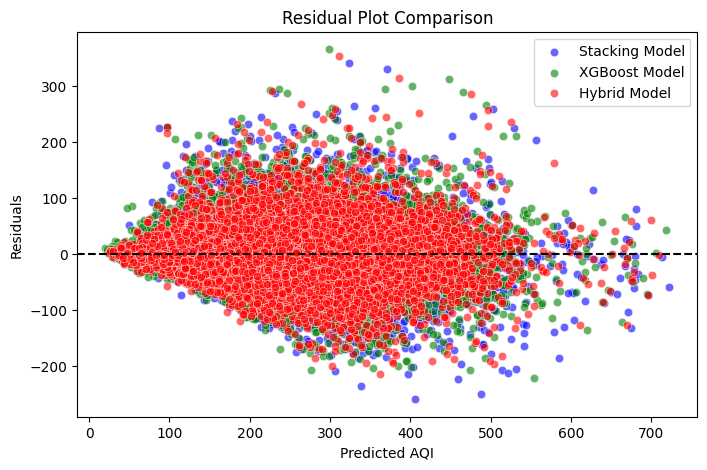

<ipython-input-49-0996fbee46e9>:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(np.array(feature_names)[stack_indices][:10], rotation=45)
<ipython-input-49-0996fbee46e9>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.array(feature_names)[xgb_indices][:10], rotation=45)


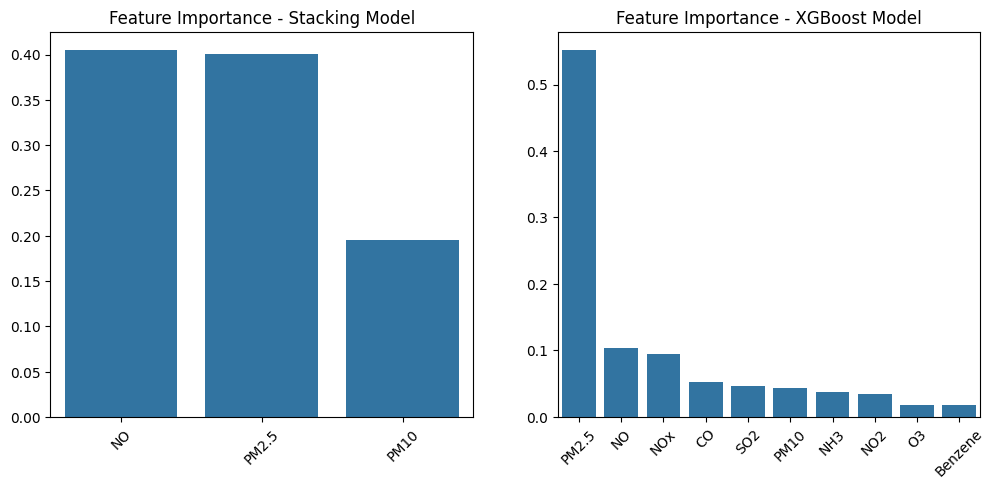

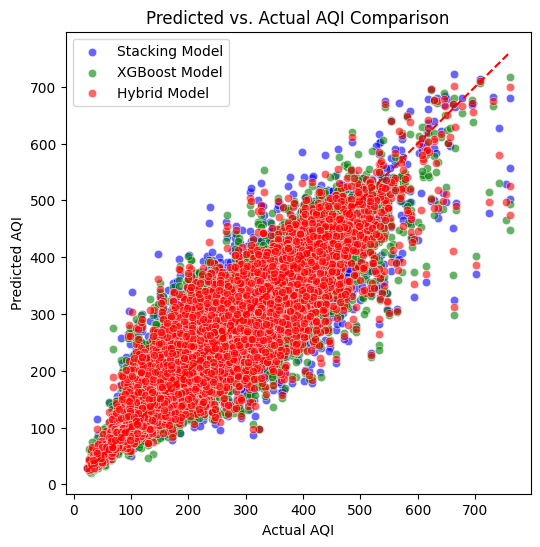

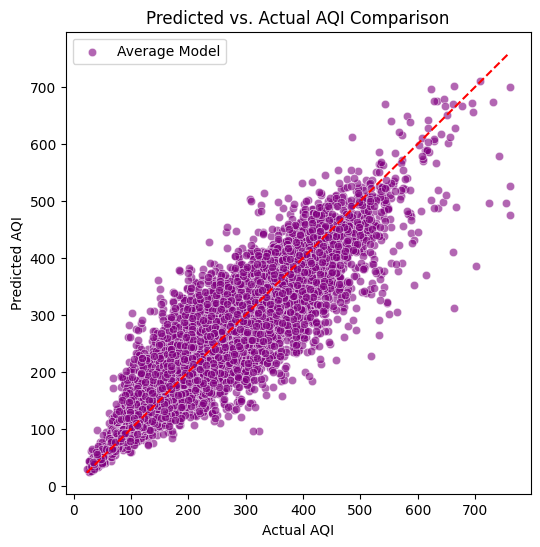

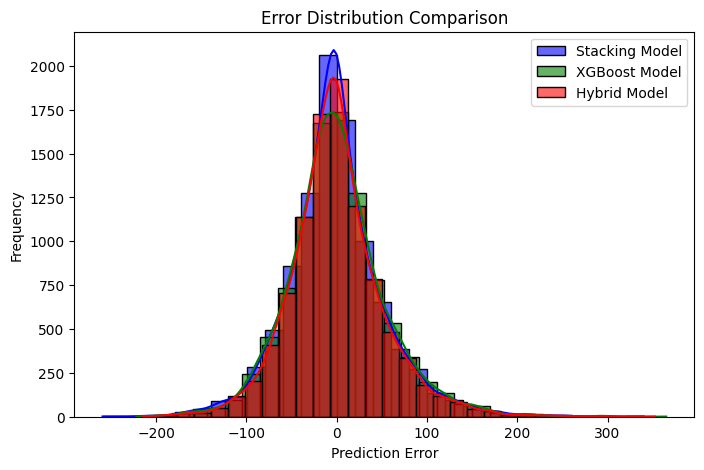

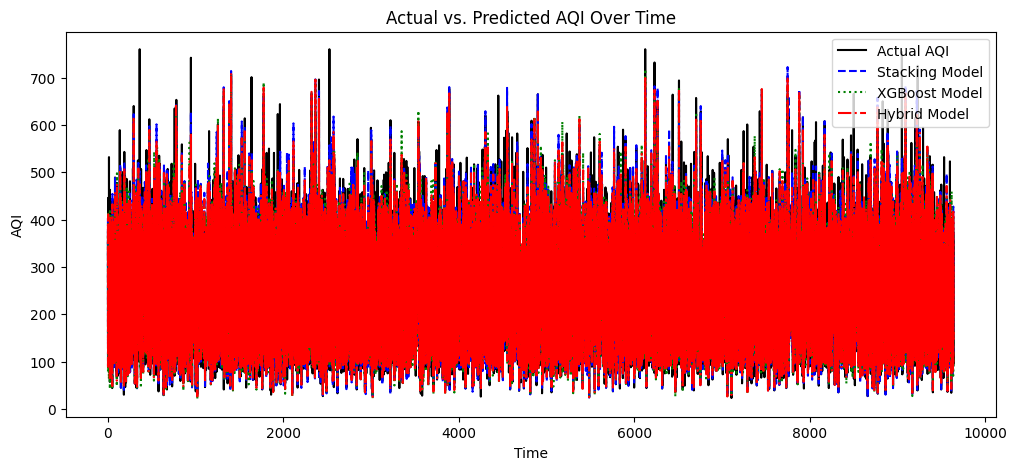

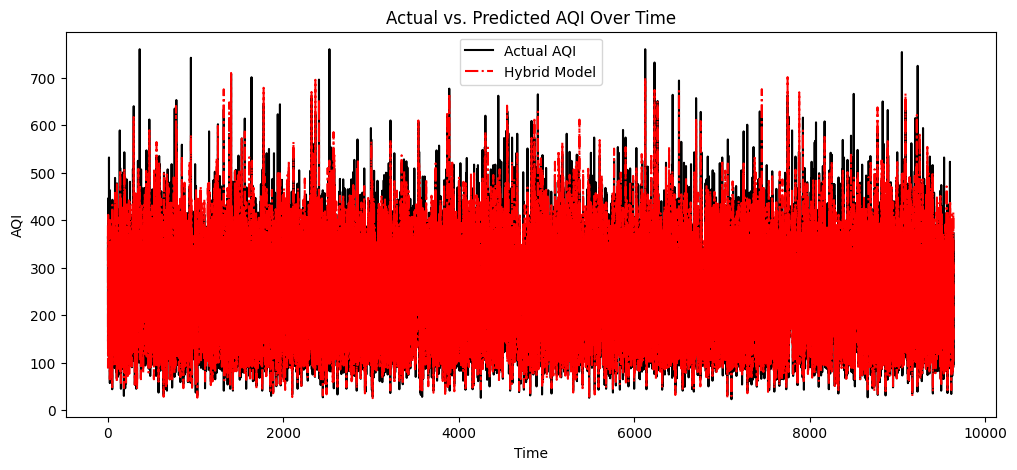

In [ ]:
plot_residuals(y_test, stack_predictions, xgb_predictions, final_predictions)
plot_feature_importance(stack_model, xgb_model, feature_cols)
plot_predicted_vs_actual(y_test, stack_predictions, xgb_predictions, final_predictions)
plot_predicted_vs_actual_avg(y_test, stack_predictions, xgb_predictions, final_predictions)
plot_error_distribution(y_test, stack_predictions, xgb_predictions, final_predictions)
plot_time_series(y_test, stack_predictions, xgb_predictions, final_predictions)
plot_ts(y_test, final_predictions)

In [ ]:
final_predictions, stack_predictions, xgb_predictions, stack_model, xgb_model = Stacking_RF_AdaBoost_XTR_XGB_Model(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (Random Forest + AdaBoost + Extra Trees + XGBoost):
Mean Squared Error (MSE): 2278.4685637589
Mean Absolute Error (MAE): 34.3433292312
Explained Variance Score (EVS): 0.8464495735
R-squared (R²): 0.8464465748
Max Error: 323.8897338867
Mean Relative Error (MRE): 0.1496787344
Mean Absolute Percentage Error (MAPE): 14.9678734403
Symmetric Mean Absolute Percentage Error (SMAPE): 14.2866198416
Mean Absolute Scaled Error (MASE): inf


<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


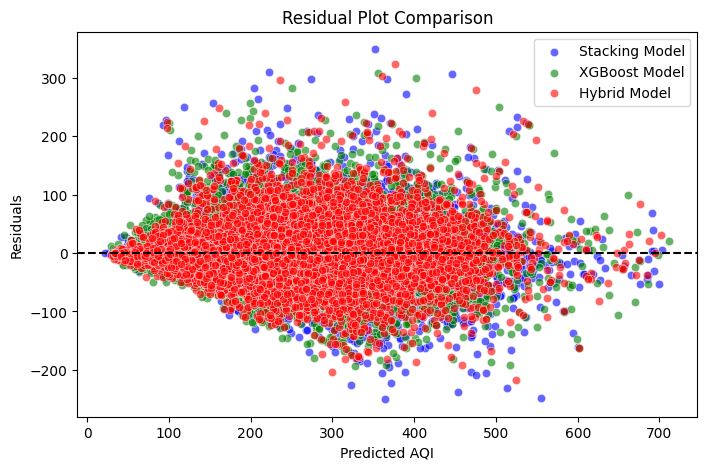

<ipython-input-49-0996fbee46e9>:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(np.array(feature_names)[stack_indices][:10], rotation=45)
<ipython-input-49-0996fbee46e9>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.array(feature_names)[xgb_indices][:10], rotation=45)


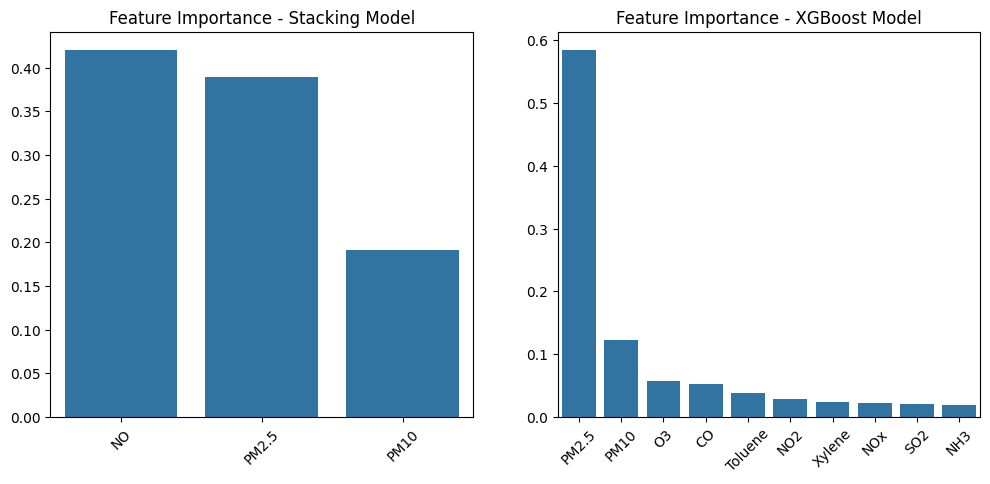

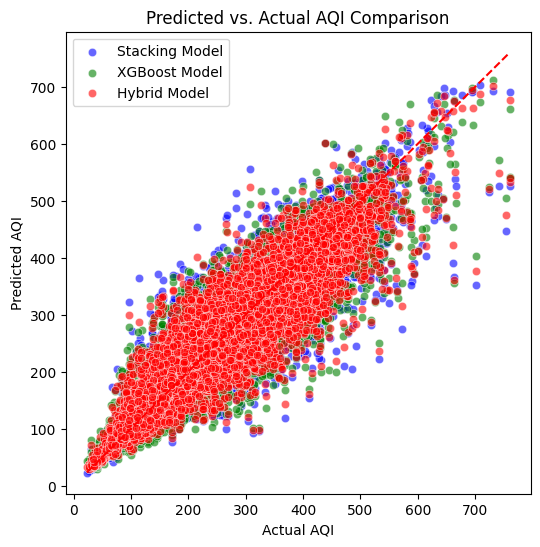

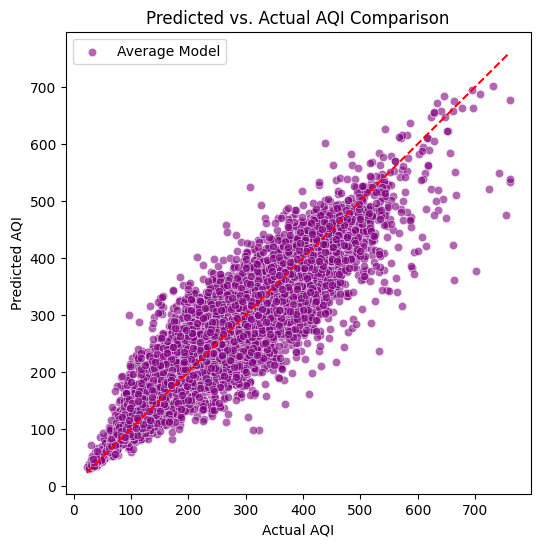

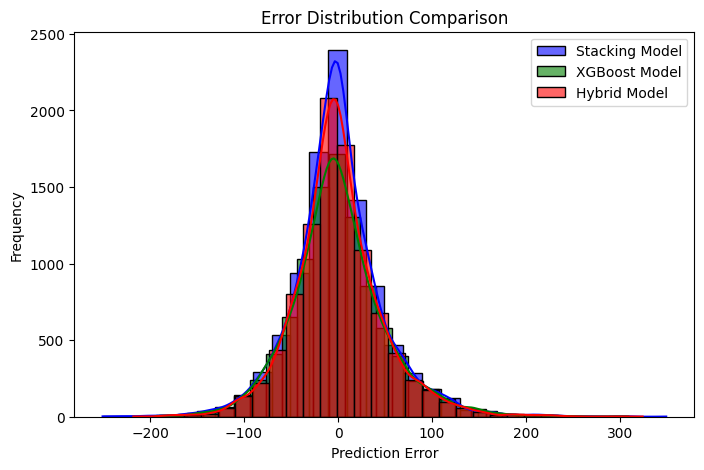

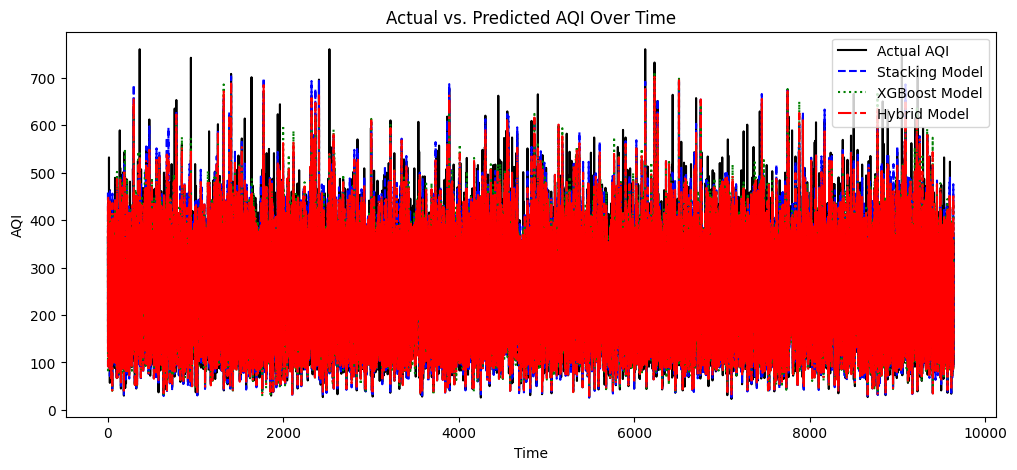

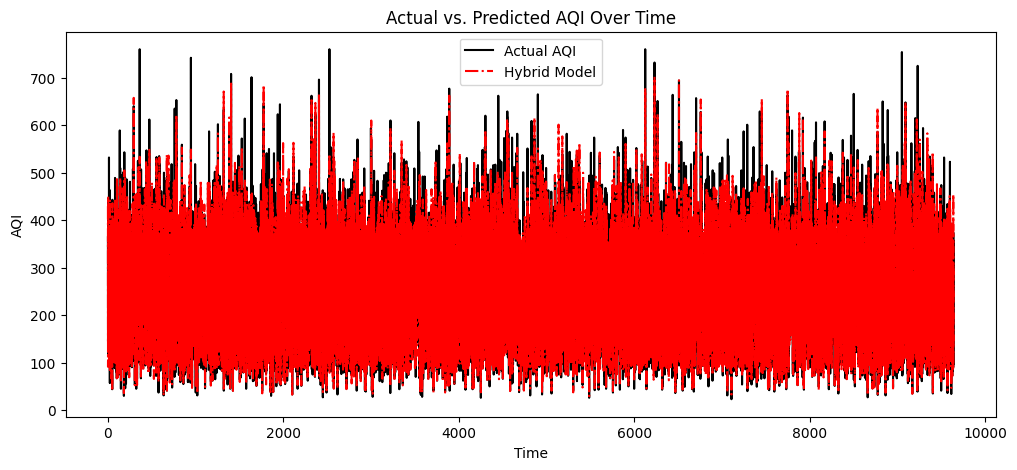

In [ ]:
plot_residuals(y_test, stack_predictions, xgb_predictions, final_predictions)
plot_feature_importance(stack_model, xgb_model, feature_cols)
plot_predicted_vs_actual(y_test, stack_predictions, xgb_predictions, final_predictions)
plot_predicted_vs_actual_avg(y_test, stack_predictions, xgb_predictions, final_predictions)
plot_error_distribution(y_test, stack_predictions, xgb_predictions, final_predictions)
plot_time_series(y_test, stack_predictions, xgb_predictions, final_predictions)
plot_ts(y_test, final_predictions)

### Random Forest + ETR [model 1]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_residuals(y_test, rf_predictions, et_predictions, hybrid_predictions):
    residuals_rf = y_test - rf_predictions
    residuals_et = y_test - et_predictions
    residuals_hybrid = y_test - hybrid_predictions

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=rf_predictions, y=residuals_rf, alpha=0.6, label="Random Forest", color="blue")
    sns.scatterplot(x=et_predictions, y=residuals_et, alpha=0.6, label="Extra Trees", color="green")
    sns.scatterplot(x=hybrid_predictions, y=residuals_hybrid, alpha=0.6, label="Hybrid Model", color="red")
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel("Predicted AQI")
    plt.ylabel("Residuals")
    plt.title("Residual Plot Comparison")
    plt.legend()
    plt.show()

def plot_feature_importance(rf_model, et_model, feature_names):
    rf_importances = rf_model.feature_importances_
    et_importances = et_model.feature_importances_

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    rf_indices = np.argsort(rf_importances)[::-1]
    sns.barplot(x=np.array(feature_names)[rf_indices][:10], y=rf_importances[rf_indices][:10], ax=axes[0])
    axes[0].set_title("Feature Importance - Random Forest")
    axes[0].set_xticklabels(np.array(feature_names)[rf_indices][:10], rotation=45)

    et_indices = np.argsort(et_importances)[::-1]
    sns.barplot(x=np.array(feature_names)[et_indices][:10], y=et_importances[et_indices][:10], ax=axes[1])
    axes[1].set_title("Feature Importance - Extra Trees")
    axes[1].set_xticklabels(np.array(feature_names)[et_indices][:10], rotation=45)

    plt.show()

def plot_predicted_vs_actual(y_test, rf_predictions, et_predictions, hybrid_predictions):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=rf_predictions, alpha=0.6, label="Random Forest", color="blue")
    sns.scatterplot(x=y_test, y=et_predictions, alpha=0.6, label="Extra Trees", color="green")
    sns.scatterplot(x=y_test, y=hybrid_predictions, alpha=0.6, label="Hybrid Model", color="red")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual AQI")
    plt.ylabel("Predicted AQI")
    plt.title("Predicted vs. Actual AQI Comparison")
    plt.legend()
    plt.show()

def plot_predicted_vs_actual_avg(y_test, rf_predictions, et_predictions, hybrid_predictions):
    plt.figure(figsize=(6, 6))
    avg = (rf_predictions + et_predictions + hybrid_predictions) / 3
    sns.scatterplot(x=y_test, y=avg, alpha=0.6, label="Average Model", color="purple")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual AQI")
    plt.ylabel("Predicted AQI")
    plt.title("Predicted vs. Actual AQI Comparison")
    plt.legend()
    plt.show()

def plot_error_distribution(y_test, rf_predictions, et_predictions, hybrid_predictions):
    errors_rf = y_test - rf_predictions
    errors_et = y_test - et_predictions
    errors_hybrid = y_test - hybrid_predictions

    plt.figure(figsize=(8, 5))
    sns.histplot(errors_rf, bins=30, kde=True, color="blue", label="Random Forest", alpha=0.6)
    sns.histplot(errors_et, bins=30, kde=True, color="green", label="Extra Trees", alpha=0.6)
    sns.histplot(errors_hybrid, bins=30, kde=True, color="red", label="Hybrid Model", alpha=0.6)
    plt.xlabel("Prediction Error")
    plt.ylabel("Frequency")
    plt.title("Error Distribution Comparison")
    plt.legend()
    plt.show()

def plot_time_series(y_test, rf_predictions, et_predictions, hybrid_predictions):
    plt.figure(figsize=(12, 5))
    plt.plot(y_test.values, label="Actual AQI", color='black')
    plt.plot(rf_predictions, label="Random Forest", color='blue', linestyle='dashed')
    plt.plot(et_predictions, label="Extra Trees", color='green', linestyle='dotted')
    plt.plot(hybrid_predictions, label="Hybrid Model", color='red', linestyle='dashdot')
    plt.xlabel("Time")
    plt.ylabel("AQI")
    plt.title("Actual vs. Predicted AQI Over Time")
    plt.legend()
    plt.show()

def plot_ts(y_test, hybrid_predictions):
    plt.figure(figsize=(12, 5))
    plt.plot(y_test.values, label="Actual AQI", color='black')
    plt.plot(hybrid_predictions, label="Hybrid Model", color='red', linestyle='dashdot')
    plt.xlabel("Time")
    plt.ylabel("AQI")
    plt.title("Actual vs. Predicted AQI Over Time")
    plt.legend()
    plt.show()


In [ ]:
def HybridModel(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize Random Forest and Extra Trees Regressors
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Train both models on the training data
    rf_model.fit(X_train_pca, y_train)
    et_model.fit(X_train_pca, y_train)

    # Predict using both models
    rf_predictions = rf_model.predict(X_test_pca)
    et_predictions = et_model.predict(X_test_pca)

    # Combine predictions (average blending)
    hybrid_predictions = (rf_predictions + et_predictions) / 2

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, hybrid_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, hybrid_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, hybrid_predictions)  # Explained Variance Score
    reg_max_error = np.max(np.abs(y_test - hybrid_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, hybrid_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, hybrid_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, hybrid_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, hybrid_predictions)  # Mean Absolute Scaled Error
    reg_r2 = r2_score(y_test, hybrid_predictions)  # R-squared

    # Print results
    print("\nHybrid Model Evaluation (Random Forest + Extra Trees):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return hybrid_predictions, rf_predictions, et_predictions, rf_model, et_model

<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error



Hybrid Model Evaluation (Random Forest + Extra Trees):
Mean Squared Error (MSE): 2549.3061987898
Mean Absolute Error (MAE): 36.5788163999
Explained Variance Score (EVS): 0.8282394517
Max Error: 347.4850000000
Mean Relative Error (MRE): 0.1637235469
Mean Absolute Percentage Error (MAPE): 16.3723546904
Symmetric Mean Absolute Percentage Error (SMAPE): 15.3184576665
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8281939436


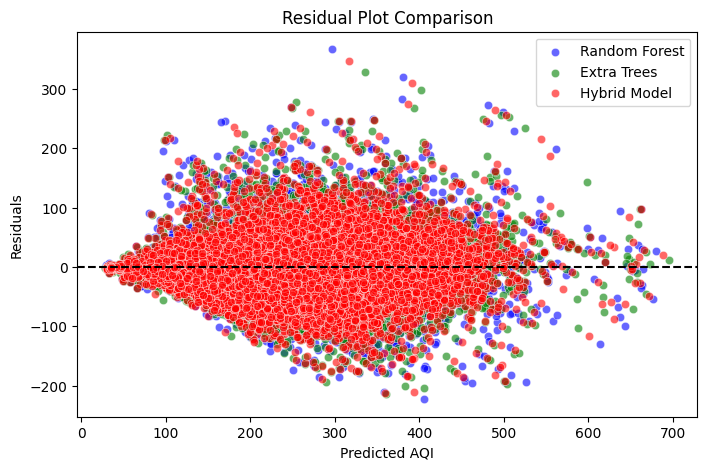

<ipython-input-54-7da184d78360>:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(np.array(feature_names)[rf_indices][:10], rotation=45)
<ipython-input-54-7da184d78360>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.array(feature_names)[et_indices][:10], rotation=45)


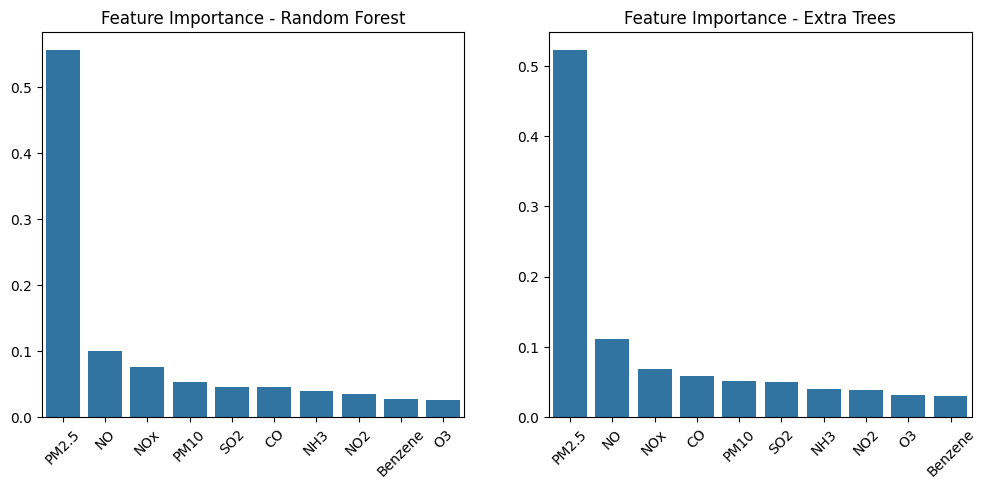

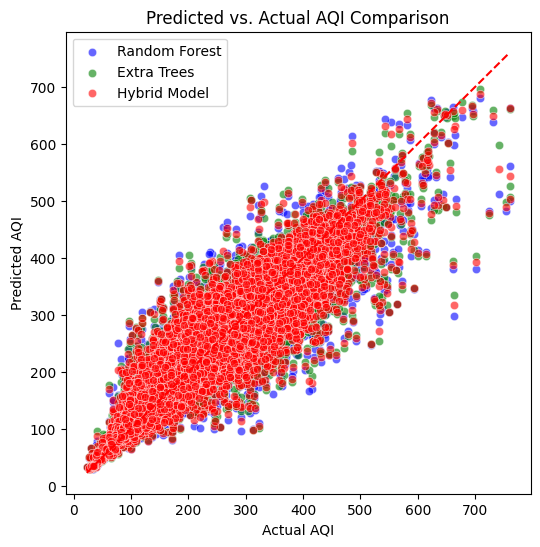

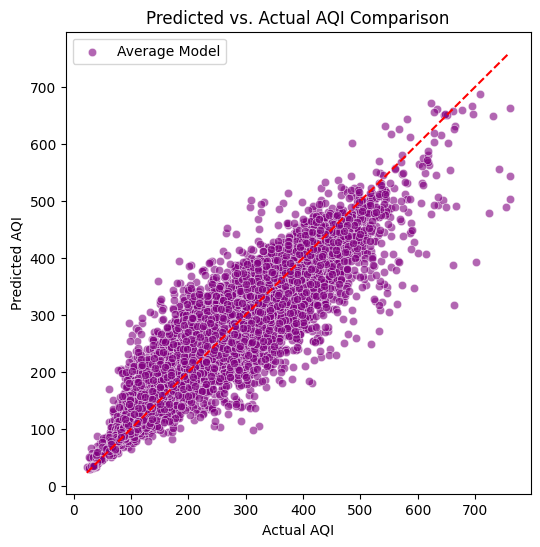

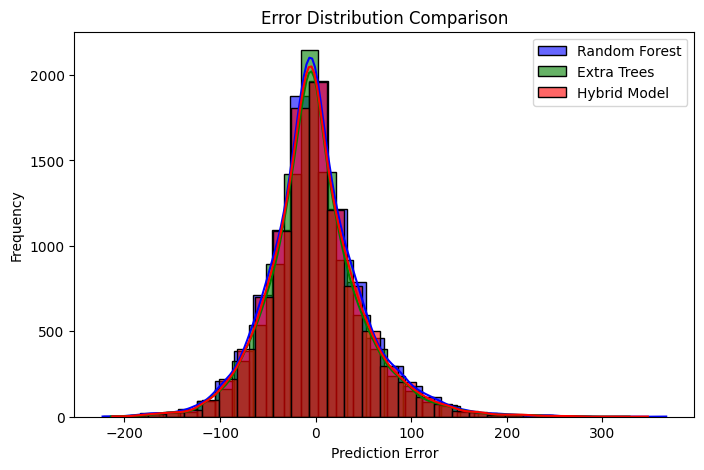

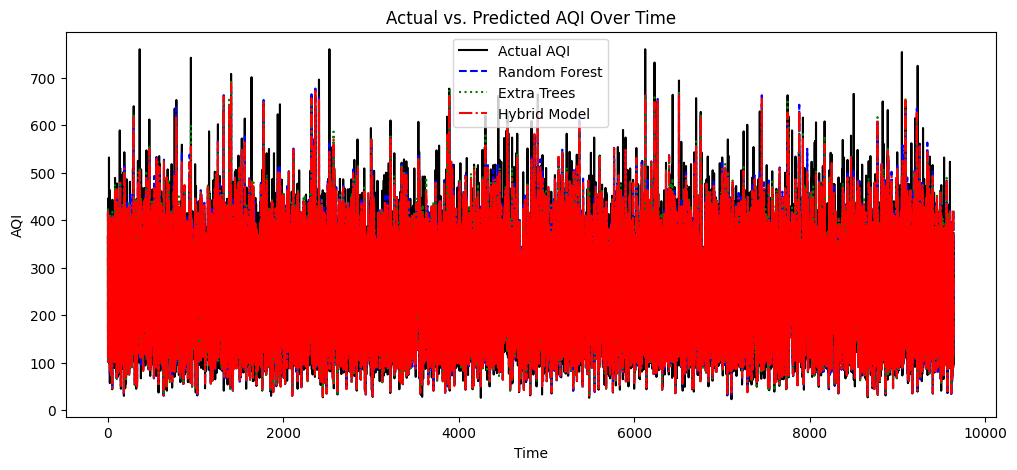

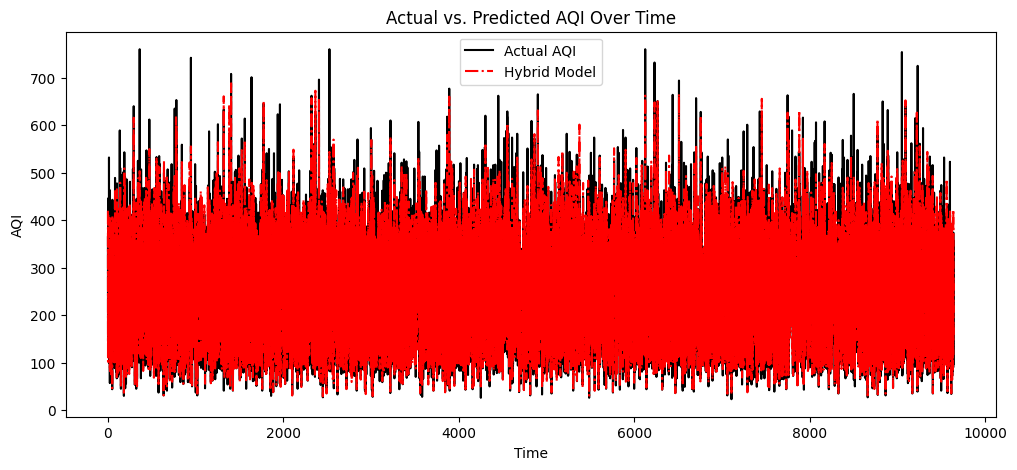

In [ ]:
hybrid_predictions, rf_predictions, et_predictions, rf_model, et_model = HybridModel(X_train_pca, y_train, X_test_pca, y_test)

plot_residuals(y_test, rf_predictions, et_predictions, hybrid_predictions)
plot_feature_importance(rf_model, et_model, feature_cols)
plot_predicted_vs_actual(y_test, rf_predictions, et_predictions, hybrid_predictions)
plot_predicted_vs_actual_avg(y_test, rf_predictions, et_predictions, hybrid_predictions)
plot_error_distribution(y_test, rf_predictions, et_predictions, hybrid_predictions)
plot_time_series(y_test, rf_predictions, et_predictions, hybrid_predictions)
plot_ts(y_test, hybrid_predictions)

<ipython-input-16-369904b74121>:13: RuntimeWarning: divide by zero encountered in scalar divide
  return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error



Hybrid Model Evaluation (Random Forest + Extra Trees):
Mean Squared Error (MSE): 2215.2340102141
Mean Absolute Error (MAE): 33.4943466632
Explained Variance Score (EVS): 0.8507170144
Max Error: 325.1398333333
Mean Relative Error (MRE): 0.1463349535
Mean Absolute Percentage Error (MAPE): 14.6334953537
Symmetric Mean Absolute Percentage Error (SMAPE): 13.8549437309
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8507081576


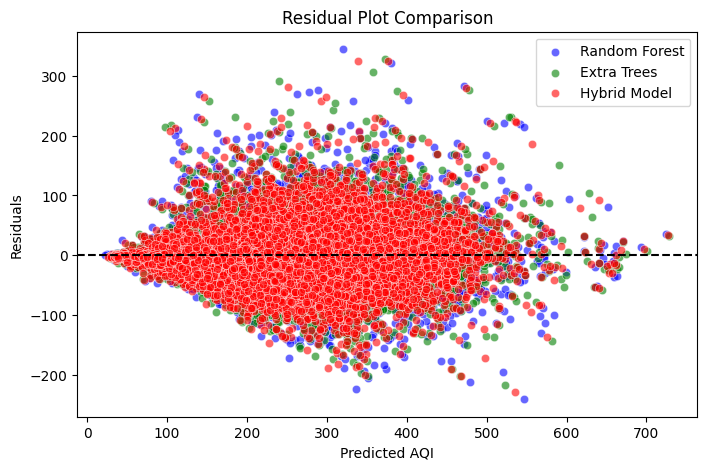

<ipython-input-54-7da184d78360>:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(np.array(feature_names)[rf_indices][:10], rotation=45)
<ipython-input-54-7da184d78360>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.array(feature_names)[et_indices][:10], rotation=45)


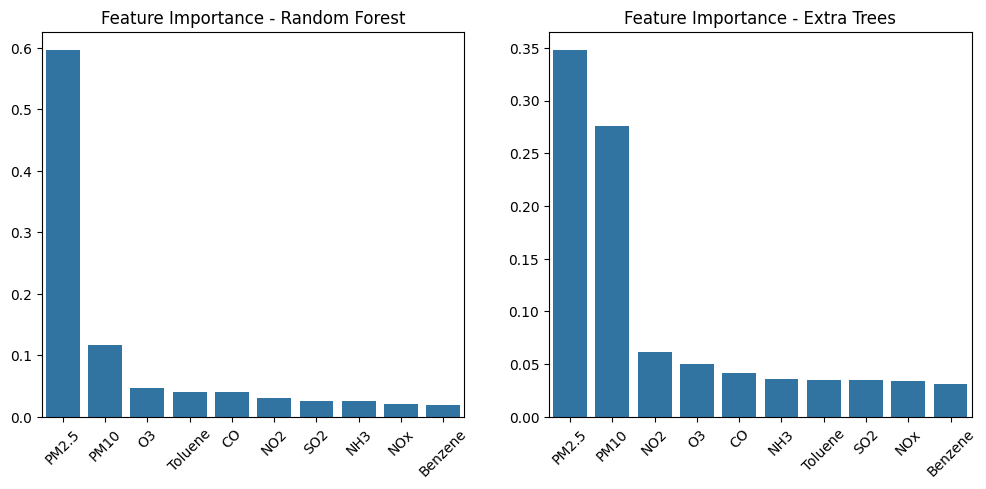

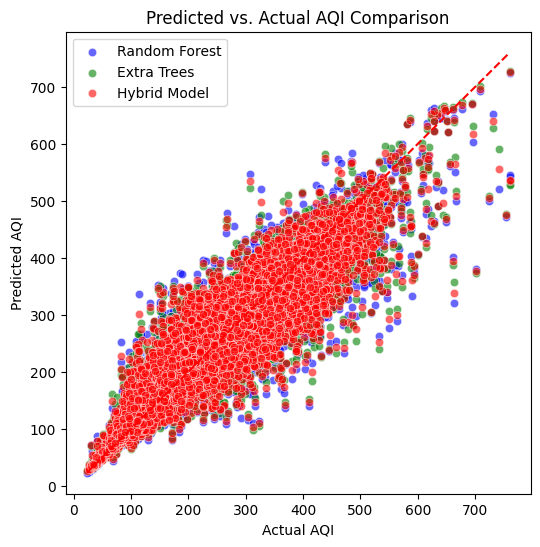

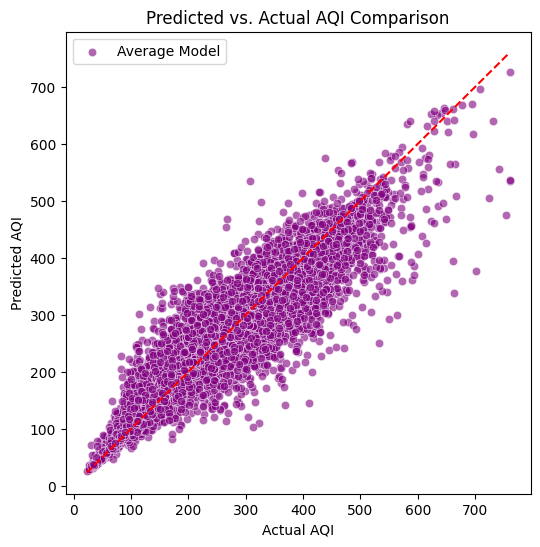

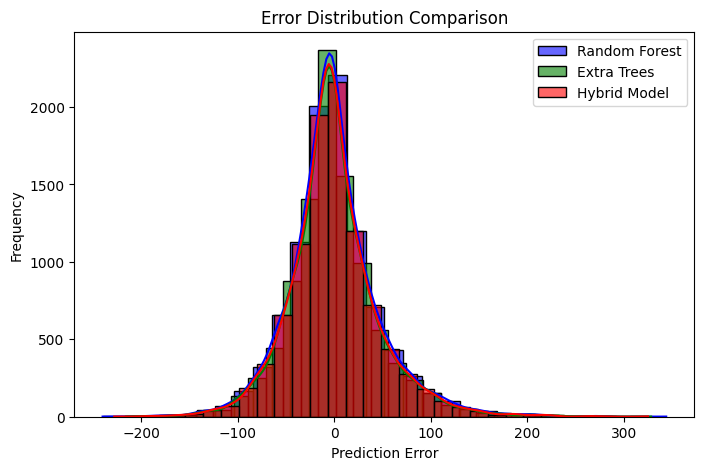

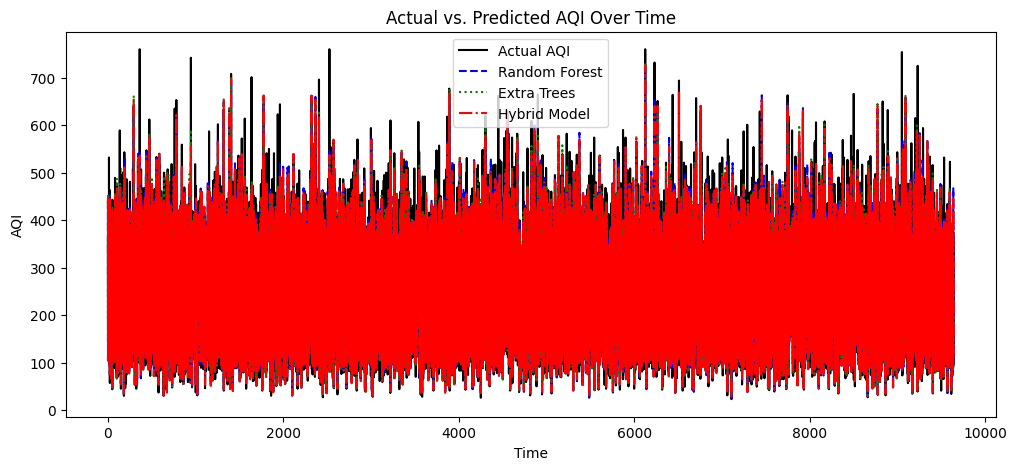

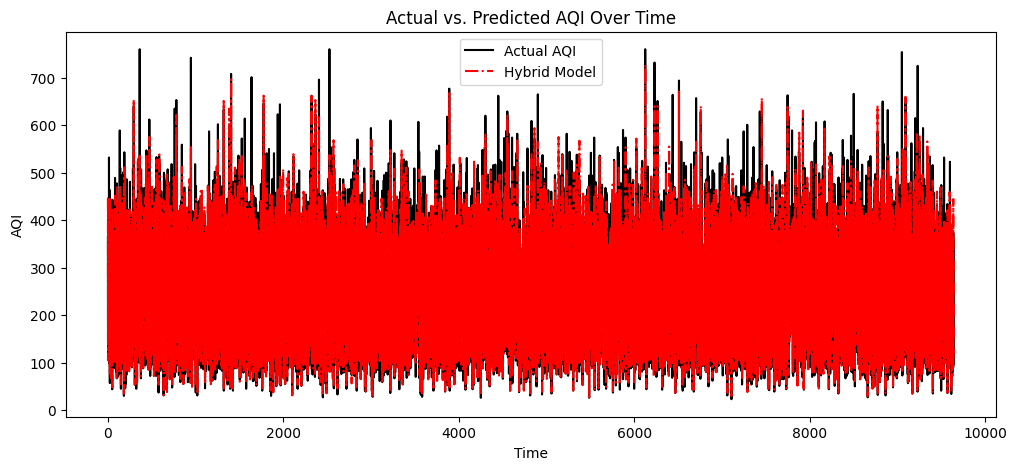

In [ ]:
hybrid_predictions, rf_predictions, et_predictions, rf_model, et_model = HybridModel(X_train_arima, y_train, X_test_arima, y_test)

plot_residuals(y_test, rf_predictions, et_predictions, hybrid_predictions)
plot_feature_importance(rf_model, et_model, feature_cols)
plot_predicted_vs_actual(y_test, rf_predictions, et_predictions, hybrid_predictions)
plot_predicted_vs_actual_avg(y_test, rf_predictions, et_predictions, hybrid_predictions)
plot_error_distribution(y_test, rf_predictions, et_predictions, hybrid_predictions)
plot_time_series(y_test, rf_predictions, et_predictions, hybrid_predictions)
plot_ts(y_test, hybrid_predictions)
